In [1]:
from classes import *
#from simulationnew import *
import SessionState
from sklearn.manifold import TSNE

# all plot with size = [20,16]
plt.rcParams['figure.figsize'] = [20, 16]

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]

idx = np.arange( p_sim['n_features'])
   
p_sim['beta'] =(-1) ** idx * np.exp(-idx / 20.)


p_sim['alpha'] = 3
p_sim['lamb'] = 1
p_sim['coef_tt'] = 1.8
p_sim['rho'] = 0.1
p_sim['kappa'] = 3.
p_sim['wd_param'] = 3. #4.



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10


In [3]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x : np.sin(np.pi*x[:,0]*x[:,1] + 2*(x[:,2]-0.5)**2 + x[:,3] + 0.5*x[:,4])

# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x : np.log(1 + np.exp(x[:,0] + x[:,1] + x[:,2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x : (np.maximum(x[:,0] + x[:,1] + x[:,2], 0) + np.maximum(x[:,3] + x[:,4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x : (np.maximum(x[:,0] + x[:,1], 0) - np.maximum(x[:,3] + x[:,4], 0))


p_sim['scheme'] =  Scheme('nonlinear', f1)


In [4]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 1.        , -0.95122942,  0.90483742, -0.86070798,  0.81873075,
         -0.77880078,  0.74081822, -0.70468809,  0.67032005, -0.63762815,
          0.60653066, -0.57694981,  0.54881164, -0.52204578,  0.4965853 ,
         -0.47236655,  0.44932896, -0.42741493,  0.40656966, -0.38674102,
          0.36787944, -0.34993775,  0.33287108, -0.31663677,  0.30119421]),
  'alpha': 3,
  'lamb': 1,
  'coef_tt': 1.8,
  'rho': 0.1,
  'kappa': 3.0,
  'wd_param': 3.0,
  'path_data': './sim_surv',
  'scheme': <classes.Scheme at 0x7f716cdce2e0>})

In [5]:

nep = Neptune("test")
nep.create_experiment()
nep.set_p_survcaus_best(p_survcaus)
# simulation
nep.run_simulation(p_sim)
## tunning
# Survcaus
nep.run_tunning_survcaus(n_trials = 1)
# BART
nep.run_tunning_bart(n_trials = 1)
# evaluation



2021-11-17 09:02:04.424 WARNING neptune.internal.hardware.gpu.gpu_monitor: Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/SurvCaus/RUNS/e/RUN-49
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
WD =  110.77679443359375
tt = 1 : 51 % 
event = 1 : 72 %
Scheme :  nonlinear


[I 2021-11-17 09:02:05,297] A new study created in memory with name: no-name-ea9236a7-3bda-44bb-b22a-d9d87e46e40c
2021-11-17 09:02:05.705 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-17 09:02:05.706 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


0:	[0s / 0s],		train_loss: 3.4191,	train_loss_surv: 3.4152,	train_loss_wass: 0.0017,	val_loss: 3.4653,	val_loss_surv: 3.4629,	val_loss_wass: 0.0011
1:	[0s / 0s],		train_loss: 3.3941,	train_loss_surv: 3.3907,	train_loss_wass: 0.0015,	val_loss: 3.4658,	val_loss_surv: 3.4635,	val_loss_wass: 0.0010
2:	[0s / 0s],		train_loss: 3.2742,	train_loss_surv: 3.2712,	train_loss_wass: 0.0013,	val_loss: 3.4668,	val_loss_surv: 3.4643,	val_loss_wass: 0.0011
3:	[0s / 1s],		train_loss: 3.2323,	train_loss_surv: 3.2284,	train_loss_wass: 0.0017,	val_loss: 3.4677,	val_loss_surv: 3.4652,	val_loss_wass: 0.0011
4:	[0s / 1s],		train_loss: 3.2926,	train_loss_surv: 3.2879,	train_loss_wass: 0.0020,	val_loss: 3.4683,	val_loss_surv: 3.4659,	val_loss_wass: 0.0010
5:	[0s / 1s],		train_loss: 3.2317,	train_loss_surv: 3.2261,	train_loss_wass: 0.0024,	val_loss: 3.4687,	val_loss_surv: 3.4664,	val_loss_wass: 0.0010
6:	[0s / 1s],		train_loss: 3.1665,	train_loss_surv: 3.1631,	train_loss_wass: 0.0015,	val_loss: 3.4692,	val_loss_

 54%|█████▎    | 107/200 [00:00<00:00, 1061.95it/s]

9:	[0s / 2s],		train_loss: 3.0692,	train_loss_surv: 3.0661,	train_loss_wass: 0.0013,	val_loss: 3.4709,	val_loss_surv: 3.4689,	val_loss_wass: 0.0009


100%|██████████| 200/200 [00:00<00:00, 1075.16it/s]
[I 2021-11-17 09:02:08,771] Trial 0 finished with value: 0.10338255488317026 and parameters: {'num_durations': 97, 'encoded_features': 91, 'alpha_wass': 2.311620255113681, 'lr': 0.0010886376791005522, 'patience': 9}. Best is trial 0 with value: 0.10338255488317026.
[I 2021-11-17 09:02:08,772] A new study created in memory with name: no-name-09ec921a-e9db-4c0b-988c-f5384fb3bd7d
100%|██████████| 200/200 [00:02<00:00, 93.92it/s] 
[I 2021-11-17 09:02:11,201] Trial 0 finished with value: 0.08317976479222426 and parameters: {'num_trees': 25, 'max_features': 'sqrt', 'max_depth': 5, 'alpha': 0.37447229727297643}. Best is trial 0 with value: 0.08317976479222426.


{'num_trees': 25,
 'max_features': 'sqrt',
 'max_depth': 5,
 'alpha': 0.37447229727297643}

# Tunning

In [6]:

    
nep.run_tunning_survcaus(n_trials = 1)

[I 2021-11-17 09:02:11,236] A new study created in memory with name: no-name-15dccadd-4e2d-4337-be4d-d7b44a35b0cb


0:	[0s / 0s],		train_loss: 3.0864,	train_loss_surv: 3.0717,	train_loss_wass: 0.0015,	val_loss: 3.1350,	val_loss_surv: 3.1257,	val_loss_wass: 0.0010
1:	[0s / 0s],		train_loss: 3.0412,	train_loss_surv: 3.0261,	train_loss_wass: 0.0015,	val_loss: 3.1348,	val_loss_surv: 3.1257,	val_loss_wass: 0.0009
2:	[0s / 0s],		train_loss: 3.0397,	train_loss_surv: 3.0232,	train_loss_wass: 0.0017,	val_loss: 3.1344,	val_loss_surv: 3.1256,	val_loss_wass: 0.0009
3:	[0s / 1s],		train_loss: 2.9857,	train_loss_surv: 2.9715,	train_loss_wass: 0.0014,	val_loss: 3.1344,	val_loss_surv: 3.1257,	val_loss_wass: 0.0009
4:	[0s / 1s],		train_loss: 2.9980,	train_loss_surv: 2.9846,	train_loss_wass: 0.0014,	val_loss: 3.1345,	val_loss_surv: 3.1259,	val_loss_wass: 0.0009
5:	[0s / 1s],		train_loss: 2.9991,	train_loss_surv: 2.9862,	train_loss_wass: 0.0013,	val_loss: 3.1351,	val_loss_surv: 3.1267,	val_loss_wass: 0.0009
6:	[0s / 1s],		train_loss: 2.9619,	train_loss_surv: 2.9505,	train_loss_wass: 0.0012,	val_loss: 3.1358,	val_loss_

 40%|████      | 81/200 [00:00<00:00, 807.47it/s]

10:	[0s / 2s],		train_loss: 2.9147,	train_loss_surv: 2.9029,	train_loss_wass: 0.0012,	val_loss: 3.1377,	val_loss_surv: 3.1299,	val_loss_wass: 0.0008


100%|██████████| 200/200 [00:00<00:00, 851.29it/s]
[I 2021-11-17 09:02:14,659] Trial 0 finished with value: 0.10478864786195148 and parameters: {'num_durations': 59, 'encoded_features': 42, 'alpha_wass': 9.802954349056417, 'lr': 0.0001394917606502618, 'patience': 7}. Best is trial 0 with value: 0.10478864786195148.


{'num_durations': 59,
 'encoded_features': 42,
 'alpha_wass': 9.802954349056417,
 'lr': 0.0001394917606502618,
 'patience': 7,
 'epochs': 40,
 'batch_size': 256}

In [7]:
nep.run_tunning_bart(n_trials = 1)

[I 2021-11-17 09:02:14,678] A new study created in memory with name: no-name-9eff49eb-dfd6-4537-963d-5bf9b014c81c
100%|██████████| 200/200 [00:00<00:00, 510.45it/s]
[I 2021-11-17 09:02:15,477] Trial 0 finished with value: 0.08040171095934384 and parameters: {'num_trees': 30, 'max_features': 'all', 'max_depth': 8, 'alpha': 0.09847517966799395}. Best is trial 0 with value: 0.08040171095934384.


{'num_trees': 30,
 'max_features': 'all',
 'max_depth': 8,
 'alpha': 0.09847517966799395}

# Training 

SurvCaus
{'num_durations': 59, 'encoded_features': 42, 'alpha_wass': 9.802954349056417, 'lr': 0.0001394917606502618, 'patience': 7, 'epochs': 40, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.9792,	train_loss_surv: 2.9751,	train_loss_wass: 0.0004,	val_loss: 3.1872,	val_loss_surv: 3.1841,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 3.0406,	train_loss_surv: 3.0352,	train_loss_wass: 0.0005,	val_loss: 3.1873,	val_loss_surv: 3.1841,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.9864,	train_loss_surv: 2.9821,	train_loss_wass: 0.0004,	val_loss: 3.1872,	val_loss_surv: 3.1840,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 3.0123,	train_loss_surv: 3.0057,	train_loss_wass: 0.0007,	val_loss: 3.1874,	val_loss_surv: 3.1843,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 3.0373,	train_loss_surv: 3.0265,	train_loss_wass: 0.0011,	val_loss: 3.1879,	val_loss_surv: 3.1849,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.9193,	train_loss_surv: 2.9143,	train_loss_wass: 0.0005,	val_loss: 

 18%|█▊        | 36/200 [00:00<00:00, 352.16it/s]

9:	[0s / 1s],		train_loss: 2.9582,	train_loss_surv: 2.9542,	train_loss_wass: 0.0004,	val_loss: 3.1916,	val_loss_surv: 3.1888,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 496.45it/s]


SurvCaus_0
{'num_durations': 59, 'encoded_features': 42, 'alpha_wass': 0.0, 'lr': 0.0001394917606502618, 'patience': 7, 'epochs': 40, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 3.0652,	train_loss_surv: 3.0652,	train_loss_wass: 0.0007,	val_loss: 3.1174,	val_loss_surv: 3.1174,	val_loss_wass: 0.0006
1:	[0s / 0s],		train_loss: 2.9582,	train_loss_surv: 2.9582,	train_loss_wass: 0.0014,	val_loss: 3.1182,	val_loss_surv: 3.1182,	val_loss_wass: 0.0006
2:	[0s / 0s],		train_loss: 2.9923,	train_loss_surv: 2.9923,	train_loss_wass: 0.0011,	val_loss: 3.1185,	val_loss_surv: 3.1185,	val_loss_wass: 0.0006
3:	[0s / 1s],		train_loss: 2.9679,	train_loss_surv: 2.9679,	train_loss_wass: 0.0009,	val_loss: 3.1187,	val_loss_surv: 3.1187,	val_loss_wass: 0.0006
4:	[0s / 1s],		train_loss: 2.9816,	train_loss_surv: 2.9816,	train_loss_wass: 0.0008,	val_loss: 3.1189,	val_loss_surv: 3.1189,	val_loss_wass: 0.0006
5:	[0s / 1s],		train_loss: 2.9408,	train_loss_surv: 2.9408,	train_loss_wass: 0.0008,	val_loss: 3.1190,	val_

 30%|██▉       | 59/200 [00:00<00:00, 585.80it/s]

7:	[0s / 2s],		train_loss: 2.9182,	train_loss_surv: 2.9182,	train_loss_wass: 0.0009,	val_loss: 3.1183,	val_loss_surv: 3.1183,	val_loss_wass: 0.0006


100%|██████████| 200/200 [00:00<00:00, 517.23it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 947.048 - ||grad||^2 = 309.53074
 * Iteration #2 - Loss = 918.008 - ||grad||^2 = 277.79038
 * Iteration #3 - Loss = 896.734 - ||grad||^2 = 249.72482
 * Iteration #4 - Loss = 880.493 - ||grad||^2 = 224.72681
 * Iteration #5 - Loss = 867.757 - ||grad||^2 = 202.36775
 * Iteration #6 - Loss = 857.584 - ||grad||^2 = 182.31592
 * Iteration #7 - Loss = 849.352 - ||grad||^2 = 164.30092
 * Iteration #8 - Loss = 842.628 - ||grad||^2 = 148.09536
 * Iteration #9 - Loss = 837.097 - ||grad||^2 = 133.50422
 * Iteration #10 - Loss = 832.526 - ||grad||^2 = 120.35795
 * Iteration #11 - Loss = 828.736 - ||grad||^2 = 108.50786
 * Iteration #12 - Loss = 825.587 - ||grad||^2 = 97.82260
 * Iteration #13 - Loss = 822.968 - ||grad||^2 = 88.18555
 * Iteration #14 - Loss = 820.789 - ||grad||^2 = 79.49277
 * Iteration #15 - Loss = 818.977 - ||grad||^2 = 71.65130
 * Iteration #16 - Loss = 817.470 - ||grad||^2 = 64.57777
 * Iteration #17 - Loss =

  0%|          | 0/200 [00:00<?, ?it/s]2021-11-17 09:02:31.438 INFO    numba.core.transforms: finding looplift candidates


 * Iteration #96 - Loss = 1088.330 - ||grad||^2 = 0.01098
 * Iteration #97 - Loss = 1088.330 - ||grad||^2 = 0.00988
Converged after 97 iterations.


100%|██████████| 200/200 [00:02<00:00, 77.87it/s] 


BART


100%|██████████| 200/200 [00:00<00:00, 420.32it/s]


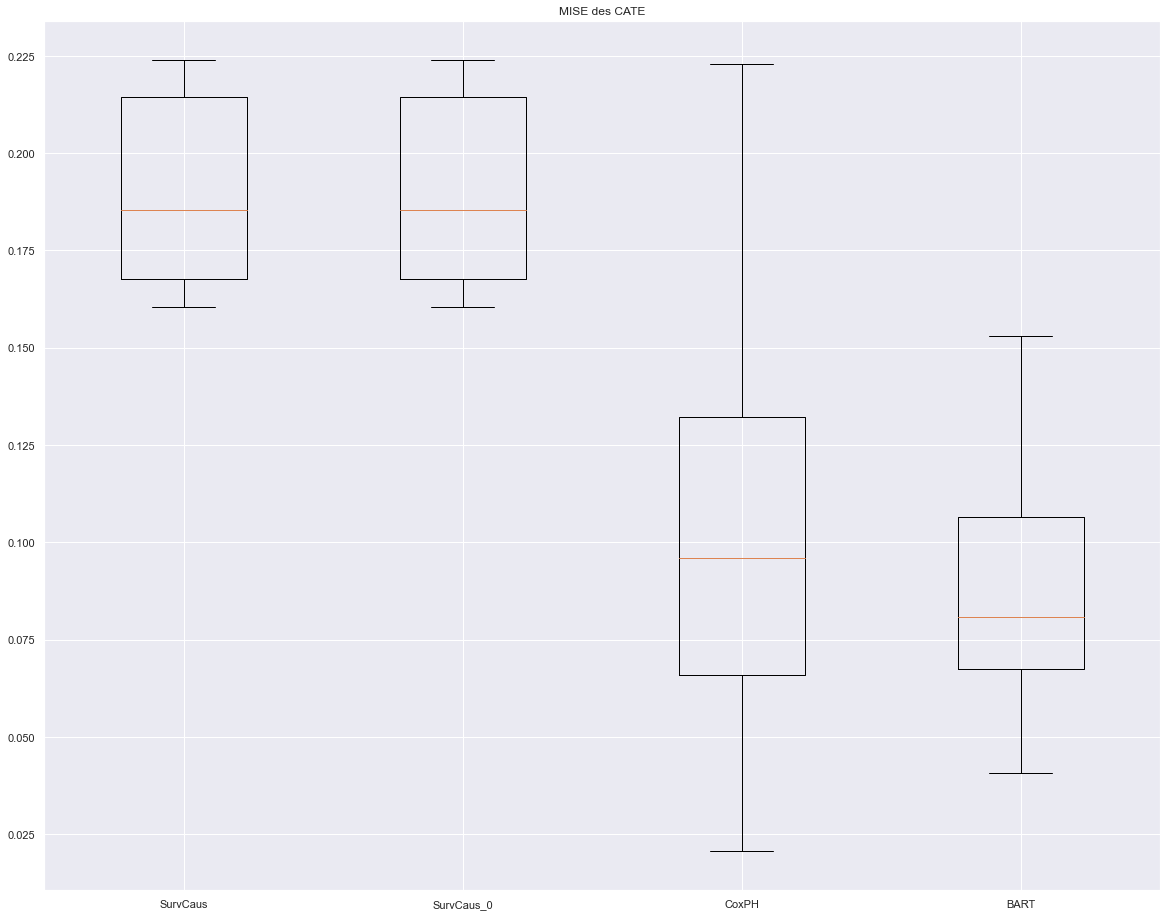

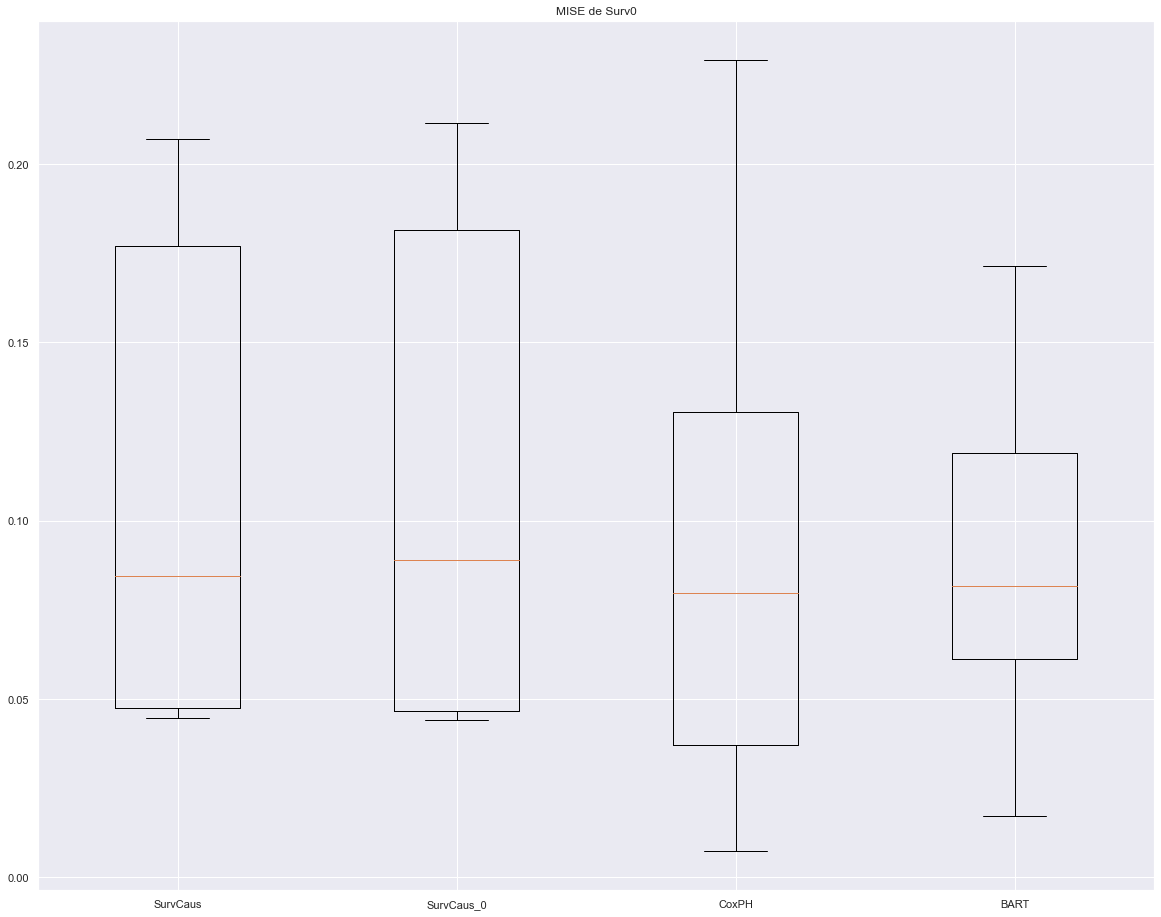

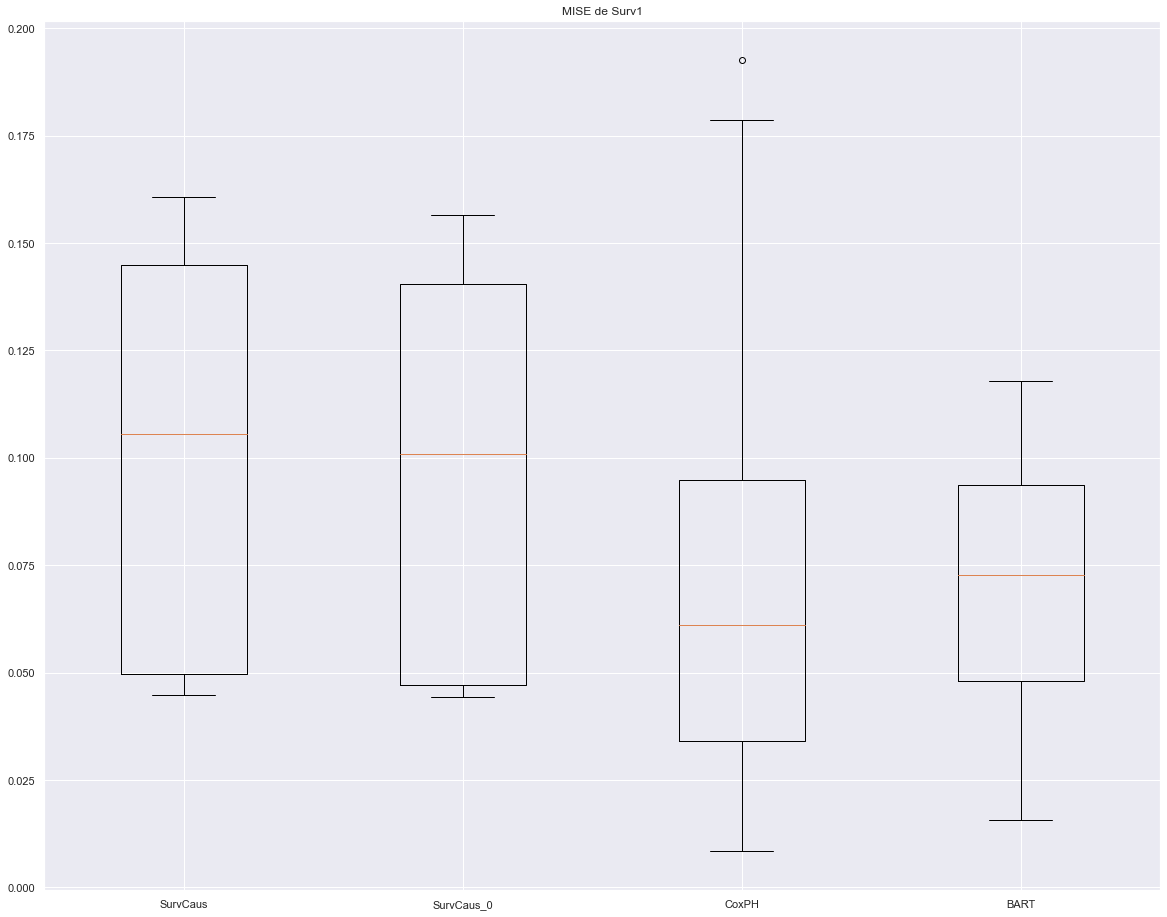

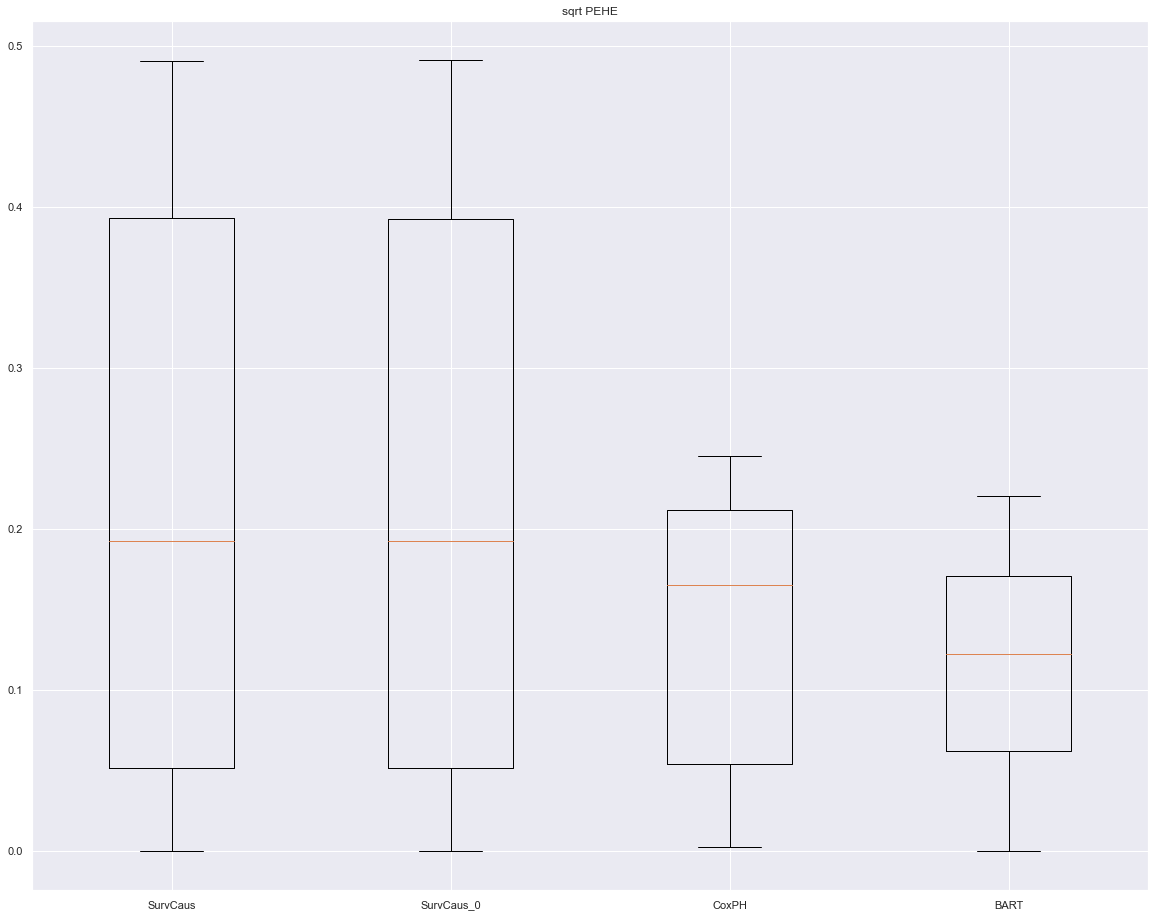

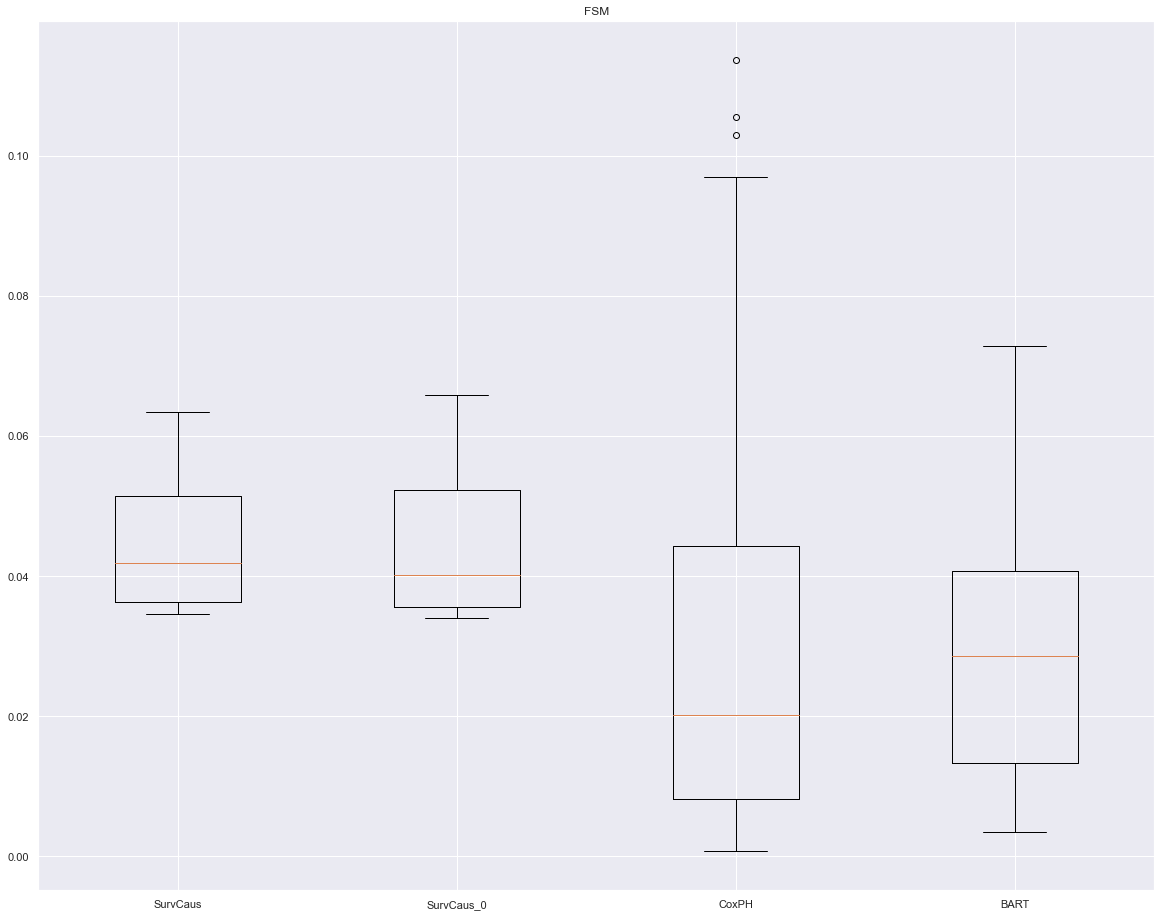

In [8]:
nep.launch_benchmark()

In [9]:
nep.bilan_csv


,models,Mise0,Mise1,CATE,PEHE,FSM
0,SurvCaus,"(0.109, 0.063)","(0.101, 0.045)","(0.19, 0.023)","(0.221, 0.172)","(0.045, 0.01)"
1,SurvCaus_0,"(0.111, 0.065)","(0.098, 0.044)","(0.19, 0.023)","(0.221, 0.172)","(0.044, 0.011)"
2,CoxPH,"(0.087, 0.056)","(0.068, 0.041)","(0.1, 0.045)","(0.138, 0.081)","(0.029, 0.025)"
3,BART,"(0.09, 0.038)","(0.072, 0.028)","(0.087, 0.027)","(0.118, 0.063)","(0.029, 0.016)"


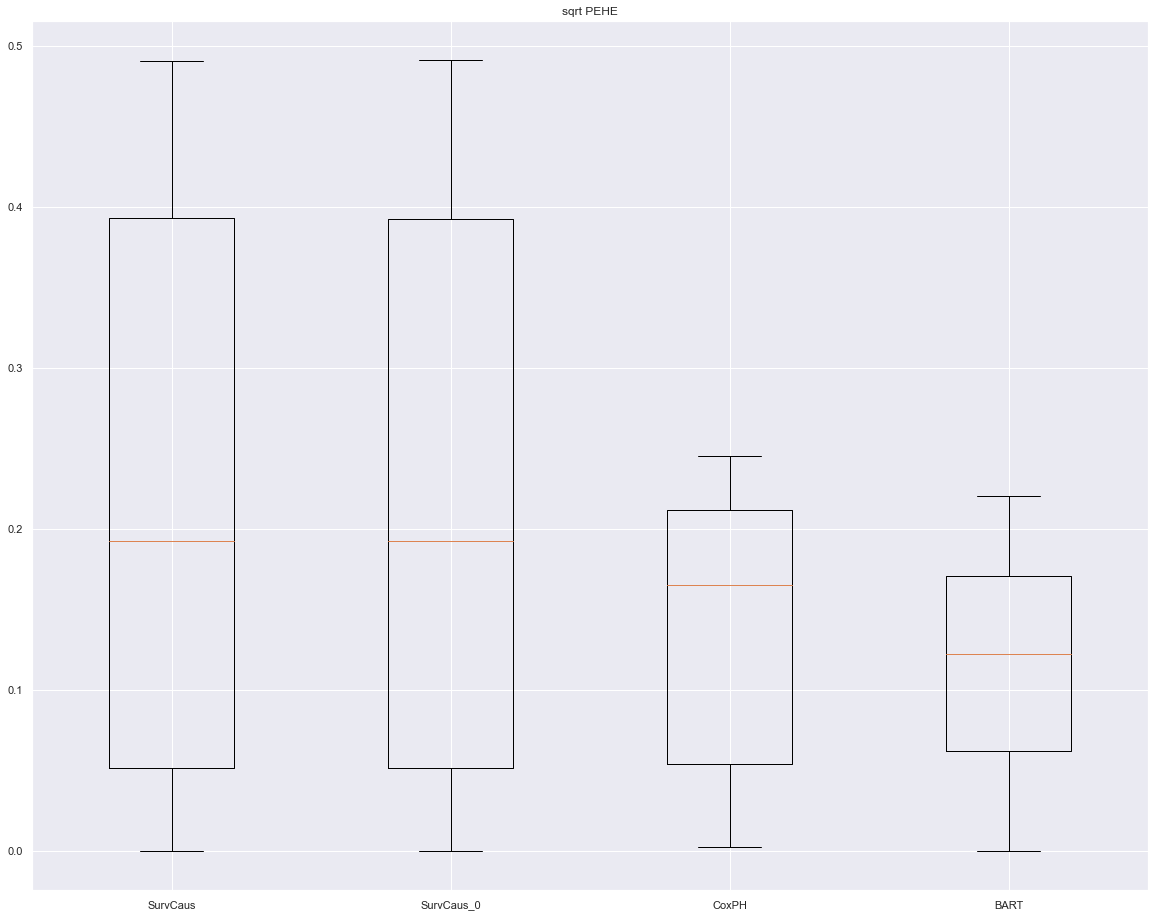

In [10]:
nep.box_plot_pehe
    


modifier S,
experiment
log - neptune
tables 
lancer :  wd, lin/nonlin, 
pas oublier brca !! 


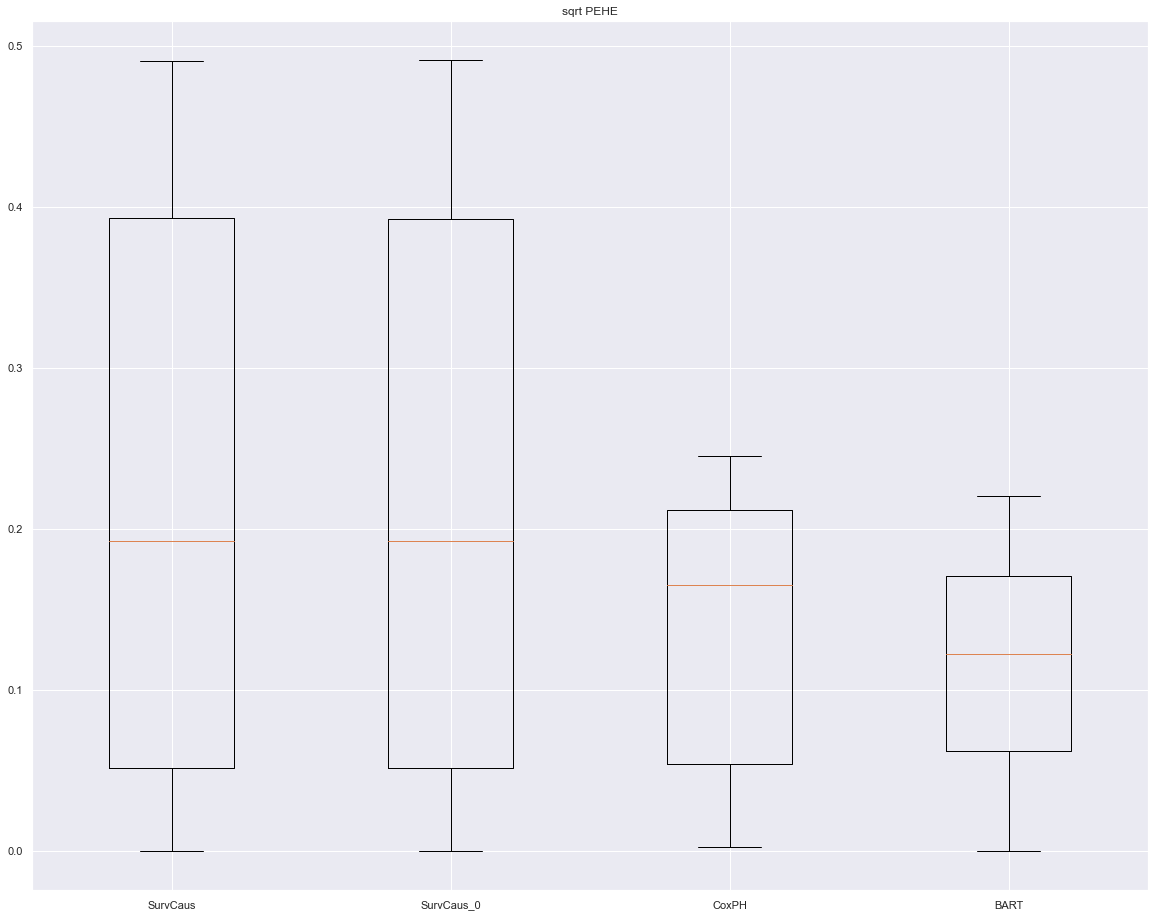

In [11]:
nep.box_plot_pehe

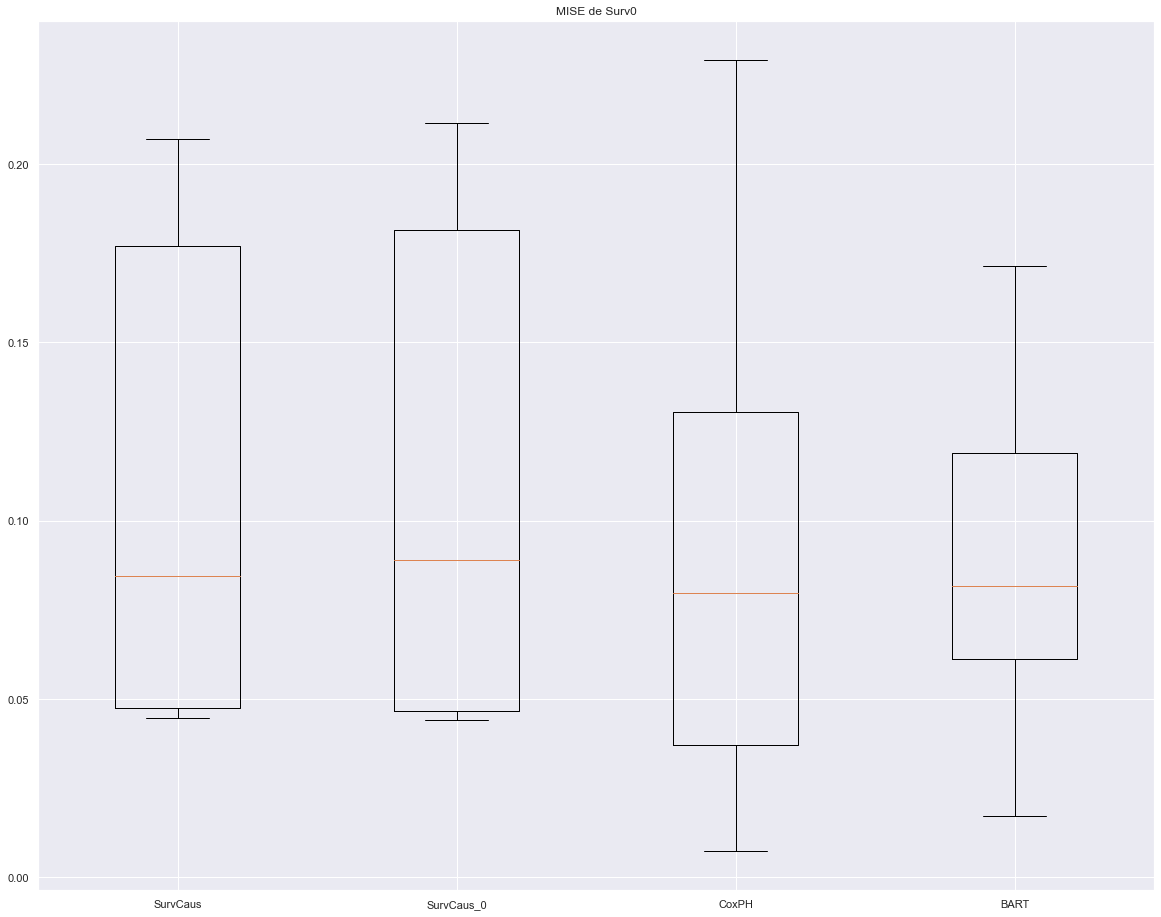

In [12]:
nep.box_plot_surv0

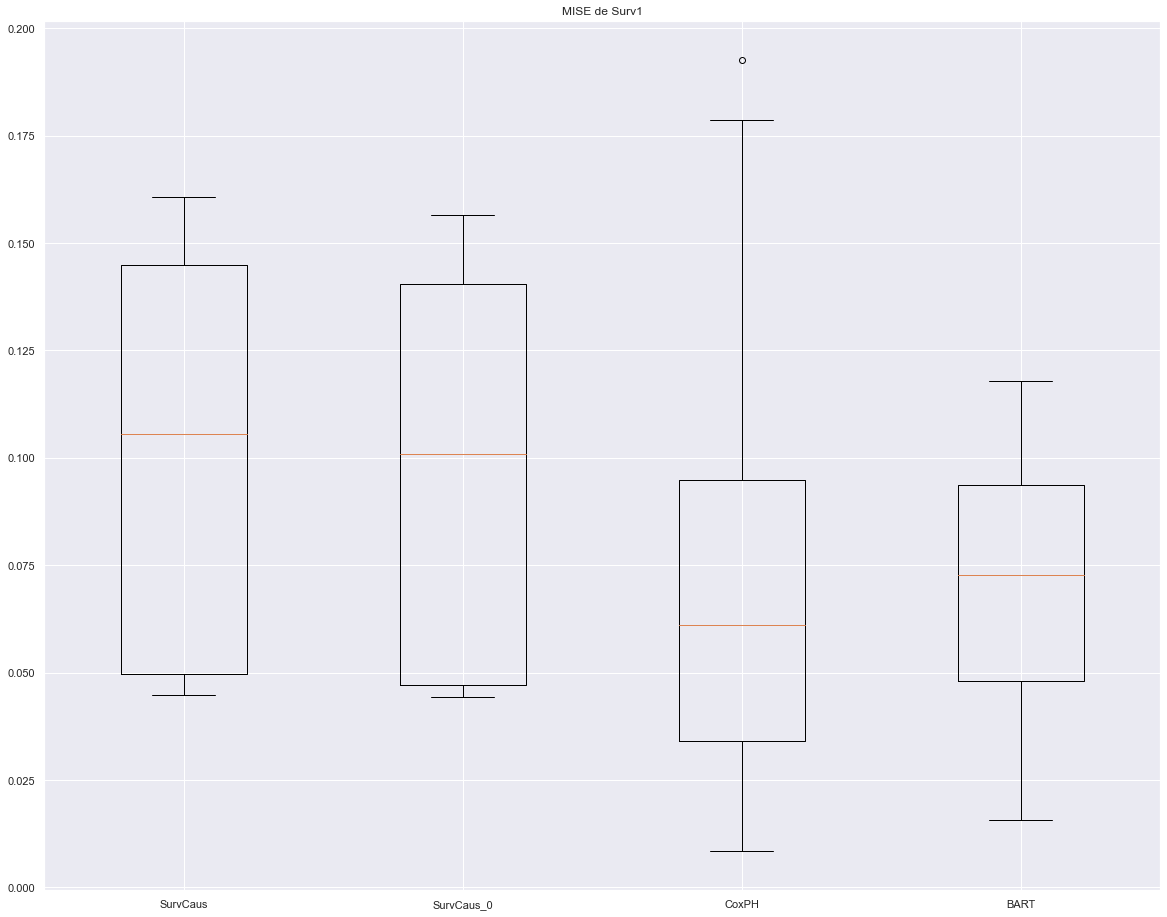

In [13]:
nep.box_plot_surv1

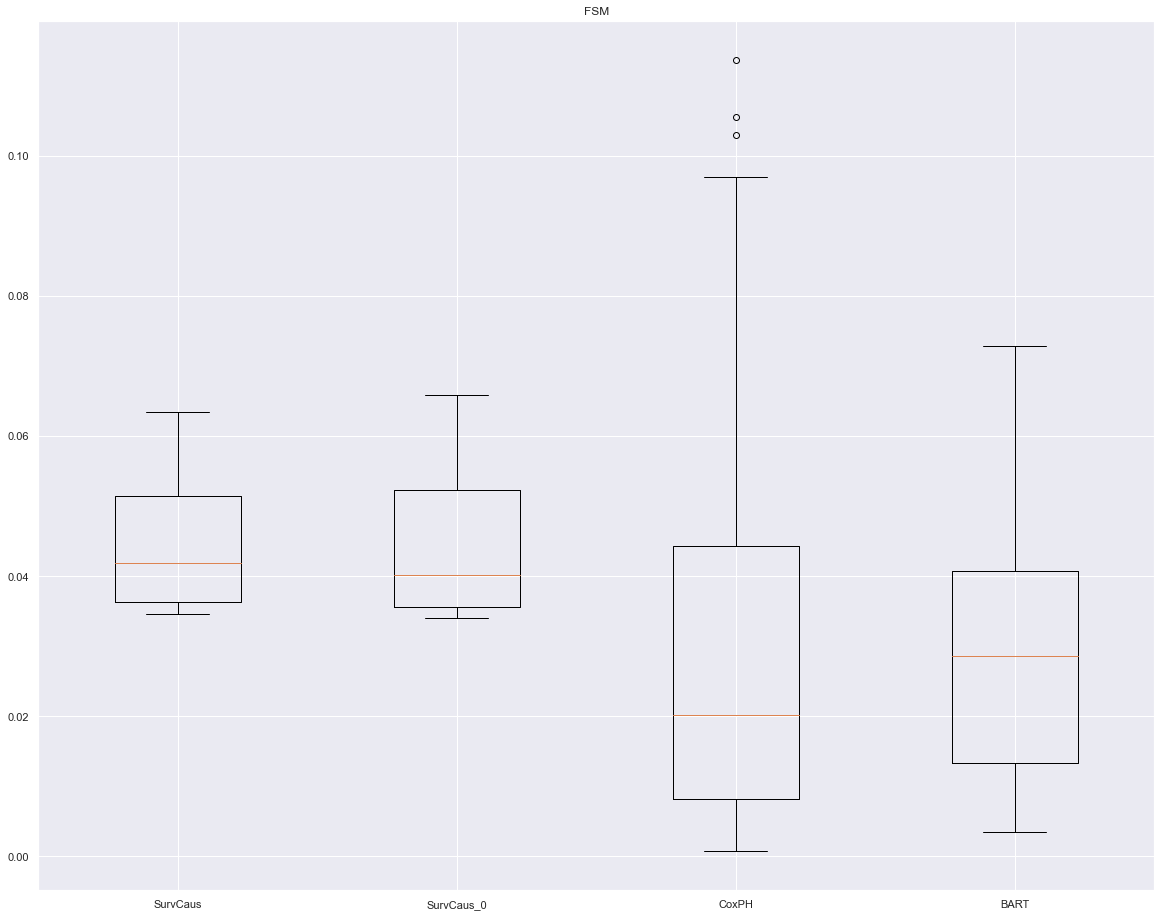

In [14]:
nep.box_plot_FSM

(p_ours,p_bench) = (70, 16)
(p_ours,p_bench) = (70, 109)
(p_ours,p_bench) = (70, 137)


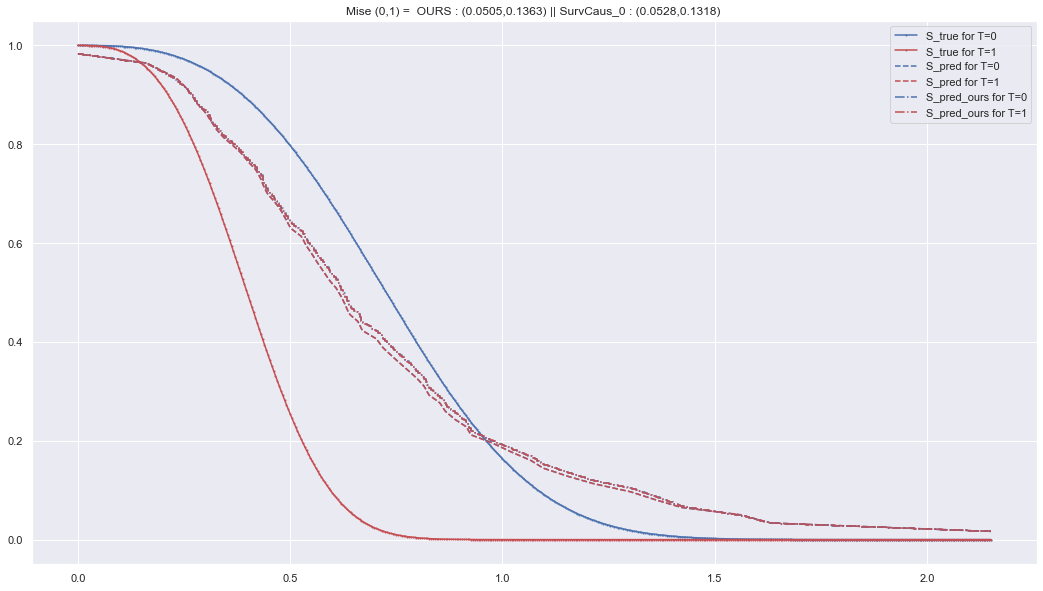

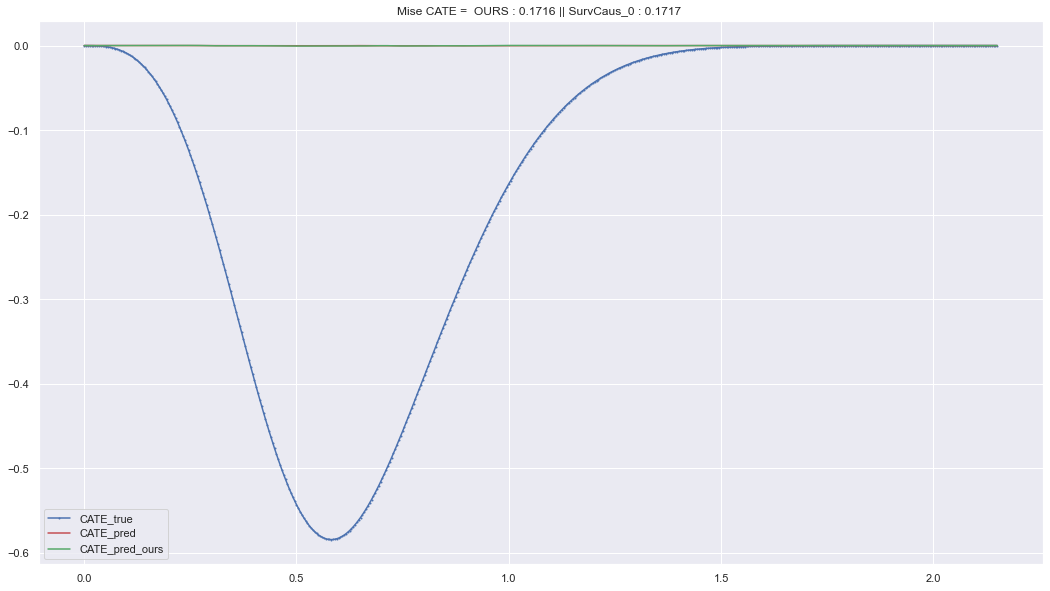

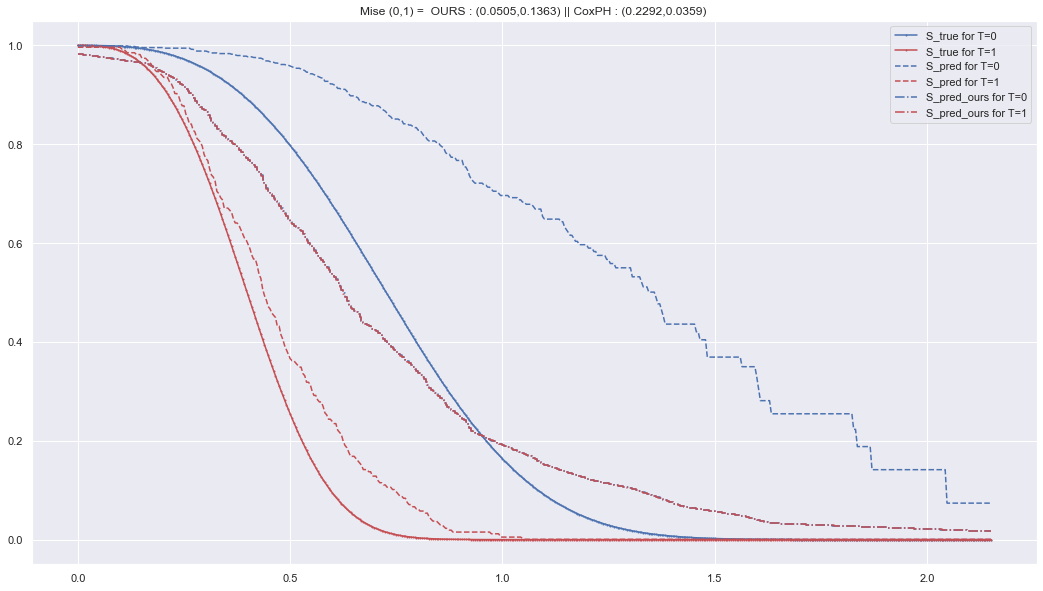

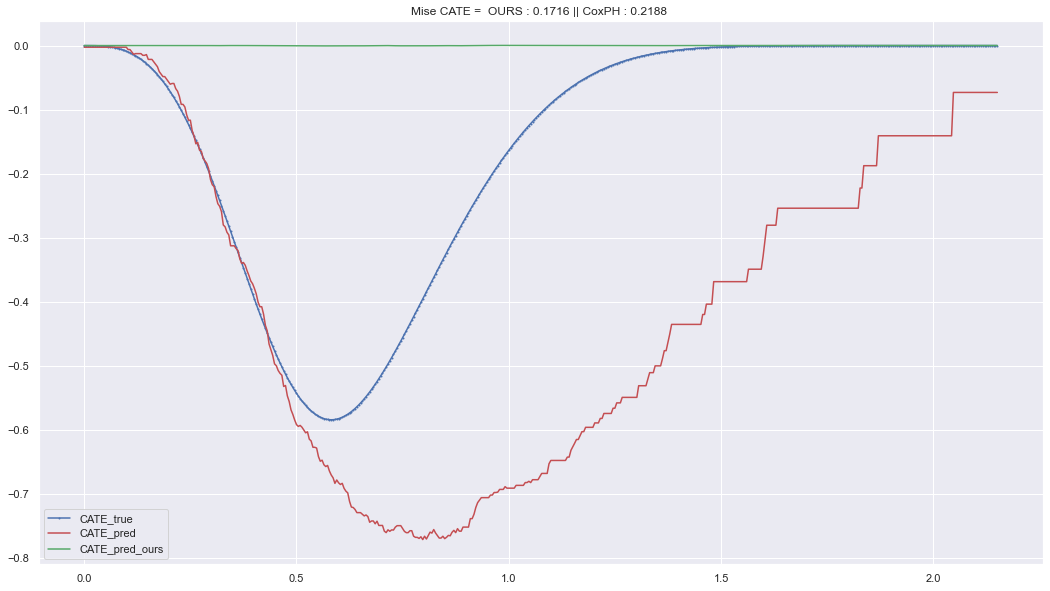

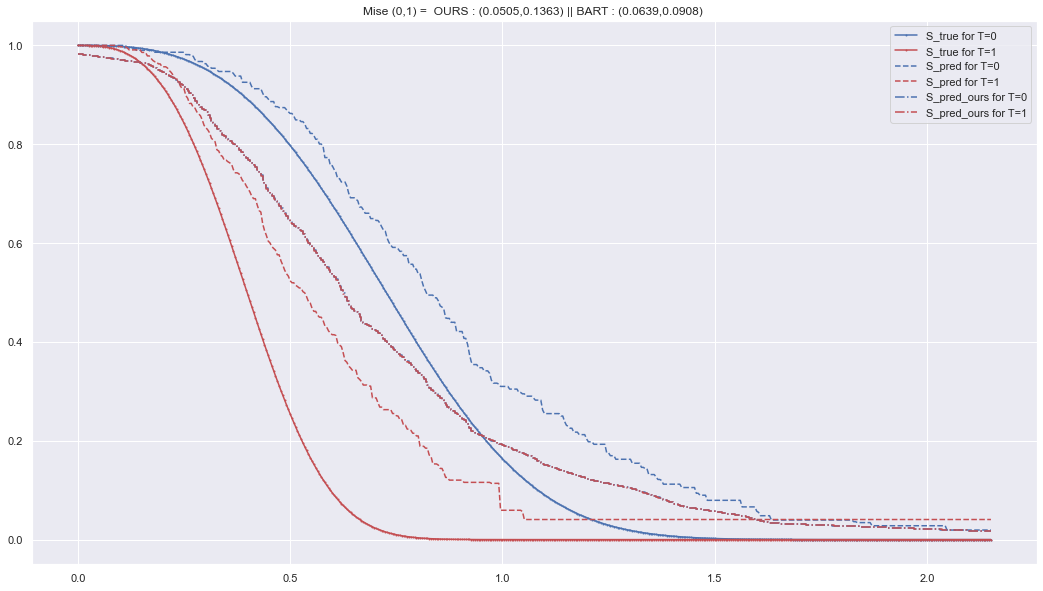

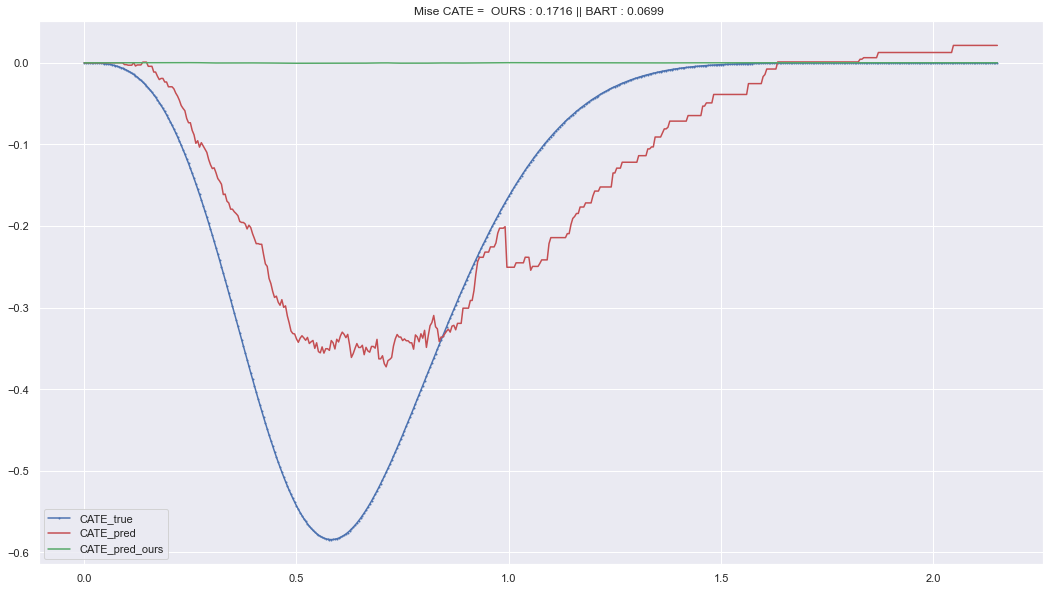

In [15]:

%matplotlib inline

nep.get_plots_patients()


In [16]:
nep.kill_experiment()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 21 operations to synchronize with Neptune. Do not kill this process.


All 21 operations synced, thanks for waiting!


WD 

In [17]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 1.        , -0.95122942,  0.90483742, -0.86070798,  0.81873075,
         -0.77880078,  0.74081822, -0.70468809,  0.67032005, -0.63762815,
          0.60653066, -0.57694981,  0.54881164, -0.52204578,  0.4965853 ,
         -0.47236655,  0.44932896, -0.42741493,  0.40656966, -0.38674102,
          0.36787944, -0.34993775,  0.33287108, -0.31663677,  0.30119421]),
  'alpha': 3,
  'lamb': 1,
  'coef_tt': 1.8,
  'rho': 0.1,
  'kappa': 3.0,
  'wd_param': 3.0,
  'path_data': './sim_surv',
  'scheme': <classes.Scheme at 0x7f716cdce2e0>})

2021-11-17 09:09:44.571 WARNING neptune.internal.hardware.gpu.gpu_monitor: Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/SurvCaus/RUNS/e/RUN-55
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
WD =  24.102540969848633
tt = 1 : 51 % 
event = 1 : 72 %
Scheme :  nonlinear


[I 2021-11-17 09:09:45,887] A new study created in memory with name: no-name-0895f013-bb1c-4929-8485-651ed5478c86
2021-11-17 09:09:46.500 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-17 09:09:46.501 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


0:	[0s / 0s],		train_loss: 2.8111,	train_loss_surv: 2.8095,	train_loss_wass: 0.0003,	val_loss: 2.8180,	val_loss_surv: 2.8167,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.7380,	train_loss_surv: 2.7350,	train_loss_wass: 0.0005,	val_loss: 2.8201,	val_loss_surv: 2.8187,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.7216,	train_loss_surv: 2.7199,	train_loss_wass: 0.0003,	val_loss: 2.8212,	val_loss_surv: 2.8199,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.7198,	train_loss_surv: 2.7171,	train_loss_wass: 0.0004,	val_loss: 2.8220,	val_loss_surv: 2.8206,	val_loss_wass: 0.0002


 27%|██▋       | 54/200 [00:00<00:00, 529.16it/s]

4:	[0s / 0s],		train_loss: 2.6512,	train_loss_surv: 2.6487,	train_loss_wass: 0.0004,	val_loss: 2.8226,	val_loss_surv: 2.8212,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 468.97it/s]
[I 2021-11-17 09:09:48,073] Trial 0 finished with value: 0.1049218426064333 and parameters: {'num_durations': 40, 'encoded_features': 49, 'alpha_wass': 6.2285886066494225, 'lr': 0.0002475828280847794}. Best is trial 0 with value: 0.1049218426064333.
[I 2021-11-17 09:09:48,074] A new study created in memory with name: no-name-a3e41f9d-8e7d-447e-a493-f0f602d5893b
100%|██████████| 200/200 [00:02<00:00, 67.83it/s] 
[I 2021-11-17 09:09:51,303] Trial 0 finished with value: 0.0692915786941175 and parameters: {'num_trees': 13, 'max_features': 'log2', 'max_depth': 6, 'alpha': 0.08783562945763991}. Best is trial 0 with value: 0.0692915786941175.


SurvCaus
{'num_durations': 40, 'encoded_features': 49, 'alpha_wass': 6.2285886066494225, 'lr': 0.0002475828280847794, 'epochs': 40, 'batch_size': 256, 'patience': 4}
0:	[0s / 0s],		train_loss: 2.7613,	train_loss_surv: 2.7566,	train_loss_wass: 0.0008,	val_loss: 2.8312,	val_loss_surv: 2.8301,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.7684,	train_loss_surv: 2.7658,	train_loss_wass: 0.0004,	val_loss: 2.8303,	val_loss_surv: 2.8292,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.7343,	train_loss_surv: 2.7297,	train_loss_wass: 0.0007,	val_loss: 2.8297,	val_loss_surv: 2.8286,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.7495,	train_loss_surv: 2.7434,	train_loss_wass: 0.0010,	val_loss: 2.8283,	val_loss_surv: 2.8272,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.7186,	train_loss_surv: 2.7165,	train_loss_wass: 0.0003,	val_loss: 2.8272,	val_loss_surv: 2.8260,	val_loss_wass: 0.0002
5:	[0s / 1s],		train_loss: 2.7103,	train_loss_surv: 2.7084,	train_loss_wass: 0.0003,	val_loss:

 31%|███       | 62/200 [00:00<00:00, 618.21it/s]

34:	[0s / 5s],		train_loss: 2.3464,	train_loss_surv: 2.3442,	train_loss_wass: 0.0004,	val_loss: 2.7348,	val_loss_surv: 2.7337,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 734.84it/s]


SurvCaus_0
{'num_durations': 40, 'encoded_features': 49, 'alpha_wass': 0.0, 'lr': 0.0002475828280847794, 'epochs': 40, 'batch_size': 256, 'patience': 4}
0:	[0s / 0s],		train_loss: 2.7959,	train_loss_surv: 2.7959,	train_loss_wass: 0.0006,	val_loss: 2.9200,	val_loss_surv: 2.9200,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.7581,	train_loss_surv: 2.7581,	train_loss_wass: 0.0002,	val_loss: 2.9218,	val_loss_surv: 2.9218,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.7026,	train_loss_surv: 2.7026,	train_loss_wass: 0.0002,	val_loss: 2.9229,	val_loss_surv: 2.9229,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.7089,	train_loss_surv: 2.7089,	train_loss_wass: 0.0006,	val_loss: 2.9236,	val_loss_surv: 2.9236,	val_loss_wass: 0.0002


 26%|██▌       | 52/200 [00:00<00:00, 509.30it/s]

4:	[0s / 0s],		train_loss: 2.7502,	train_loss_surv: 2.7502,	train_loss_wass: 0.0002,	val_loss: 2.9242,	val_loss_surv: 2.9242,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 550.21it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 892.081 - ||grad||^2 = 154.73359
 * Iteration #2 - Loss = 871.265 - ||grad||^2 = 138.73997
 * Iteration #3 - Loss = 856.127 - ||grad||^2 = 124.56653
 * Iteration #4 - Loss = 844.752 - ||grad||^2 = 111.93782
 * Iteration #5 - Loss = 836.009 - ||grad||^2 = 100.64752
 * Iteration #6 - Loss = 829.184 - ||grad||^2 = 90.53160
 * Iteration #7 - Loss = 823.795 - ||grad||^2 = 81.45449
 * Iteration #8 - Loss = 819.505 - ||grad||^2 = 73.30122
 * Iteration #9 - Loss = 816.071 - ||grad||^2 = 65.97255
 * Iteration #10 - Loss = 813.310 - ||grad||^2 = 59.38178
 * Iteration #11 - Loss = 811.083 - ||grad||^2 = 53.45252
 * Iteration #12 - Loss = 809.283 - ||grad||^2 = 48.11703
 * Iteration #13 - Loss = 807.826 - ||grad||^2 = 43.31502
 * Iteration #14 - Loss = 806.645 - ||grad||^2 = 38.99262
 * Iteration #15 - Loss = 805.687 - ||grad||^2 = 35.10162
 * Iteration #16 - Loss = 804.909 - ||grad||^2 = 31.59879
 * Iteration #17 - Loss = 804.2

  0%|          | 0/200 [00:00<?, ?it/s]

 * Iteration #98 - Loss = 1115.261 - ||grad||^2 = 0.01289
 * Iteration #99 - Loss = 1115.261 - ||grad||^2 = 0.01160
 * Iteration #100 - Loss = 1115.261 - ||grad||^2 = 0.01044
 * Iteration #101 - Loss = 1115.261 - ||grad||^2 = 0.00940
Converged after 101 iterations.


2021-11-17 09:10:10.727 INFO    numba.core.transforms: finding looplift candidates
100%|██████████| 200/200 [00:03<00:00, 57.78it/s] 


BART


100%|██████████| 200/200 [00:00<00:00, 286.28it/s]


(p_ours,p_bench) = (187, 68)
(p_ours,p_bench) = (187, 72)
(p_ours,p_bench) = (187, 112)
WD =  512.4902954101562
tt = 1 : 49 % 
event = 1 : 70 %
Scheme :  nonlinear


[I 2021-11-17 09:10:19,337] A new study created in memory with name: no-name-1ad3dd59-d4aa-494c-b3e8-10095b04b9d6


0:	[0s / 0s],		train_loss: 2.8061,	train_loss_surv: 2.7819,	train_loss_wass: 0.0027,	val_loss: 2.7046,	val_loss_surv: 2.6928,	val_loss_wass: 0.0013
1:	[0s / 1s],		train_loss: 2.6713,	train_loss_surv: 2.6554,	train_loss_wass: 0.0018,	val_loss: 2.6972,	val_loss_surv: 2.6897,	val_loss_wass: 0.0008
2:	[0s / 1s],		train_loss: 2.6351,	train_loss_surv: 2.6196,	train_loss_wass: 0.0017,	val_loss: 2.6927,	val_loss_surv: 2.6865,	val_loss_wass: 0.0007
3:	[0s / 2s],		train_loss: 2.5197,	train_loss_surv: 2.5058,	train_loss_wass: 0.0016,	val_loss: 2.6873,	val_loss_surv: 2.6813,	val_loss_wass: 0.0007
4:	[0s / 2s],		train_loss: 2.5247,	train_loss_surv: 2.5109,	train_loss_wass: 0.0015,	val_loss: 2.6811,	val_loss_surv: 2.6756,	val_loss_wass: 0.0006
5:	[0s / 2s],		train_loss: 2.4413,	train_loss_surv: 2.4324,	train_loss_wass: 0.0010,	val_loss: 2.6750,	val_loss_surv: 2.6698,	val_loss_wass: 0.0006
6:	[0s / 3s],		train_loss: 2.4731,	train_loss_surv: 2.4574,	train_loss_wass: 0.0018,	val_loss: 2.6678,	val_loss_

100%|██████████| 200/200 [00:00<00:00, 501.96it/s]
[I 2021-11-17 09:10:26,198] Trial 0 finished with value: 0.08515100299815176 and parameters: {'num_durations': 40, 'encoded_features': 68, 'alpha_wass': 8.939523883894584, 'lr': 0.0018810515152427524}. Best is trial 0 with value: 0.08515100299815176.
[I 2021-11-17 09:10:26,200] A new study created in memory with name: no-name-63b15c79-a0c1-4a3b-a739-13060e4dc5ae
100%|██████████| 200/200 [00:00<00:00, 294.91it/s]
[I 2021-11-17 09:10:27,319] Trial 0 finished with value: 0.07357130998458822 and parameters: {'num_trees': 16, 'max_features': 'all', 'max_depth': 9, 'alpha': 0.05851123953152099}. Best is trial 0 with value: 0.07357130998458822.


SurvCaus
{'num_durations': 40, 'encoded_features': 68, 'alpha_wass': 8.939523883894584, 'lr': 0.0018810515152427524, 'epochs': 40, 'batch_size': 256, 'patience': 4}
0:	[0s / 0s],		train_loss: 2.8204,	train_loss_surv: 2.7999,	train_loss_wass: 0.0023,	val_loss: 2.7513,	val_loss_surv: 2.7335,	val_loss_wass: 0.0020
1:	[1s / 2s],		train_loss: 2.6737,	train_loss_surv: 2.6544,	train_loss_wass: 0.0022,	val_loss: 2.7457,	val_loss_surv: 2.7320,	val_loss_wass: 0.0015
2:	[0s / 2s],		train_loss: 2.5614,	train_loss_surv: 2.5500,	train_loss_wass: 0.0013,	val_loss: 2.7423,	val_loss_surv: 2.7298,	val_loss_wass: 0.0014
3:	[0s / 3s],		train_loss: 2.6261,	train_loss_surv: 2.6171,	train_loss_wass: 0.0010,	val_loss: 2.7391,	val_loss_surv: 2.7274,	val_loss_wass: 0.0013
4:	[0s / 3s],		train_loss: 2.5310,	train_loss_surv: 2.5152,	train_loss_wass: 0.0018,	val_loss: 2.7352,	val_loss_surv: 2.7238,	val_loss_wass: 0.0013
5:	[0s / 4s],		train_loss: 2.5560,	train_loss_surv: 2.5479,	train_loss_wass: 0.0009,	val_loss: 

 28%|██▊       | 56/200 [00:00<00:00, 553.43it/s]

20:	[0s / 7s],		train_loss: 1.8956,	train_loss_surv: 1.8860,	train_loss_wass: 0.0011,	val_loss: 2.6558,	val_loss_surv: 2.6457,	val_loss_wass: 0.0011


100%|██████████| 200/200 [00:00<00:00, 567.06it/s]


SurvCaus_0
{'num_durations': 40, 'encoded_features': 68, 'alpha_wass': 0.0, 'lr': 0.0018810515152427524, 'epochs': 40, 'batch_size': 256, 'patience': 4}
0:	[1s / 1s],		train_loss: 2.8166,	train_loss_surv: 2.8166,	train_loss_wass: 0.0087,	val_loss: 2.6542,	val_loss_surv: 2.6542,	val_loss_wass: 0.0109
1:	[1s / 2s],		train_loss: 2.7255,	train_loss_surv: 2.7255,	train_loss_wass: 0.0147,	val_loss: 2.6547,	val_loss_surv: 2.6547,	val_loss_wass: 0.0143
2:	[1s / 4s],		train_loss: 2.7063,	train_loss_surv: 2.7063,	train_loss_wass: 0.0174,	val_loss: 2.6563,	val_loss_surv: 2.6563,	val_loss_wass: 0.0157
3:	[0s / 5s],		train_loss: 2.6415,	train_loss_surv: 2.6415,	train_loss_wass: 0.0149,	val_loss: 2.6560,	val_loss_surv: 2.6560,	val_loss_wass: 0.0141


 41%|████      | 82/200 [00:00<00:00, 818.91it/s]

4:	[1s / 6s],		train_loss: 2.5544,	train_loss_surv: 2.5544,	train_loss_wass: 0.0164,	val_loss: 2.6547,	val_loss_surv: 2.6547,	val_loss_wass: 0.0120


100%|██████████| 200/200 [00:00<00:00, 773.96it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 979.197 - ||grad||^2 = 267.57636
 * Iteration #2 - Loss = 937.803 - ||grad||^2 = 238.75940
 * Iteration #3 - Loss = 910.733 - ||grad||^2 = 213.81641
 * Iteration #4 - Loss = 891.642 - ||grad||^2 = 191.85565
 * Iteration #5 - Loss = 877.558 - ||grad||^2 = 172.36149
 * Iteration #6 - Loss = 866.848 - ||grad||^2 = 154.97561
 * Iteration #7 - Loss = 858.528 - ||grad||^2 = 139.42367
 * Iteration #8 - Loss = 851.962 - ||grad||^2 = 125.48386
 * Iteration #9 - Loss = 846.719 - ||grad||^2 = 112.97096
 * Iteration #10 - Loss = 842.496 - ||grad||^2 = 101.72697
 * Iteration #11 - Loss = 839.073 - ||grad||^2 = 91.61526
 * Iteration #12 - Loss = 836.284 - ||grad||^2 = 82.51647
 * Iteration #13 - Loss = 834.005 - ||grad||^2 = 74.32558
 * Iteration #14 - Loss = 832.139 - ||grad||^2 = 66.94964
 * Iteration #15 - Loss = 830.607 - ||grad||^2 = 60.30607
 * Iteration #16 - Loss = 829.349 - ||grad||^2 = 54.32121
 * Iteration #17 - Loss = 

100%|██████████| 200/200 [00:00<00:00, 392.48it/s]


BART


100%|██████████| 200/200 [00:00<00:00, 557.10it/s]


(p_ours,p_bench) = (79, 15)
(p_ours,p_bench) = (79, 12)
(p_ours,p_bench) = (79, 34)


/home/aabraich/Documents/APP/streamlit_app/utils.py:485: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



WD =  2050.413330078125
tt = 1 : 48 % 
event = 1 : 73 %
Scheme :  nonlinear


[I 2021-11-17 09:10:59,192] A new study created in memory with name: no-name-8e517110-9803-4991-b076-769e074a1b00


0:	[0s / 0s],		train_loss: 3.3019,	train_loss_surv: 3.2638,	train_loss_wass: 0.0042,	val_loss: 3.1227,	val_loss_surv: 3.1013,	val_loss_wass: 0.0024
1:	[0s / 0s],		train_loss: 3.1594,	train_loss_surv: 3.1337,	train_loss_wass: 0.0029,	val_loss: 3.1116,	val_loss_surv: 3.0927,	val_loss_wass: 0.0021
2:	[0s / 0s],		train_loss: 3.0600,	train_loss_surv: 3.0401,	train_loss_wass: 0.0022,	val_loss: 3.1029,	val_loss_surv: 3.0880,	val_loss_wass: 0.0017
3:	[0s / 0s],		train_loss: 3.0323,	train_loss_surv: 3.0075,	train_loss_wass: 0.0028,	val_loss: 3.1037,	val_loss_surv: 3.0905,	val_loss_wass: 0.0015
4:	[0s / 1s],		train_loss: 2.9321,	train_loss_surv: 2.9232,	train_loss_wass: 0.0010,	val_loss: 3.0830,	val_loss_surv: 3.0712,	val_loss_wass: 0.0013
5:	[0s / 1s],		train_loss: 2.9083,	train_loss_surv: 2.8932,	train_loss_wass: 0.0017,	val_loss: 3.0783,	val_loss_surv: 3.0666,	val_loss_wass: 0.0013
6:	[0s / 1s],		train_loss: 2.8244,	train_loss_surv: 2.8035,	train_loss_wass: 0.0023,	val_loss: 3.0690,	val_loss_

 41%|████      | 82/200 [00:00<00:00, 808.80it/s]

11:	[0s / 3s],		train_loss: 2.6277,	train_loss_surv: 2.6213,	train_loss_wass: 0.0007,	val_loss: 3.1793,	val_loss_surv: 3.1725,	val_loss_wass: 0.0008


100%|██████████| 200/200 [00:00<00:00, 808.12it/s]
[I 2021-11-17 09:11:03,163] Trial 0 finished with value: 0.09008611966748524 and parameters: {'num_durations': 64, 'encoded_features': 44, 'alpha_wass': 9.001241833894264, 'lr': 0.005647074794668058}. Best is trial 0 with value: 0.09008611966748524.
[I 2021-11-17 09:11:03,164] A new study created in memory with name: no-name-6c253dba-0a1b-4d9a-9537-e82a8e4a0b66
/home/aabraich/anaconda3/lib/python3.8/site-packages/pysurvival/models/survival_forest.py:399: RuntimeWarning:

invalid value encountered in true_divide

100%|██████████| 200/200 [00:00<00:00, 536.56it/s]
[I 2021-11-17 09:11:03,809] Trial 0 finished with value: 0.08603644176757225 and parameters: {'num_trees': 18, 'max_features': 'all', 'max_depth': 10, 'alpha': 0.06483587571858167}. Best is trial 0 with value: 0.08603644176757225.


SurvCaus
{'num_durations': 64, 'encoded_features': 44, 'alpha_wass': 9.001241833894264, 'lr': 0.005647074794668058, 'epochs': 40, 'batch_size': 256, 'patience': 4}
0:	[0s / 0s],		train_loss: 3.3203,	train_loss_surv: 3.2557,	train_loss_wass: 0.0072,	val_loss: 3.0845,	val_loss_surv: 3.0549,	val_loss_wass: 0.0033
1:	[0s / 1s],		train_loss: 3.2694,	train_loss_surv: 3.2299,	train_loss_wass: 0.0044,	val_loss: 3.0746,	val_loss_surv: 3.0530,	val_loss_wass: 0.0024
2:	[0s / 1s],		train_loss: 3.0819,	train_loss_surv: 3.0642,	train_loss_wass: 0.0020,	val_loss: 3.0574,	val_loss_surv: 3.0498,	val_loss_wass: 0.0008
3:	[0s / 1s],		train_loss: 3.1480,	train_loss_surv: 3.1388,	train_loss_wass: 0.0010,	val_loss: 3.0497,	val_loss_surv: 3.0422,	val_loss_wass: 0.0008
4:	[0s / 2s],		train_loss: 3.0354,	train_loss_surv: 3.0260,	train_loss_wass: 0.0010,	val_loss: 3.0415,	val_loss_surv: 3.0337,	val_loss_wass: 0.0009
5:	[0s / 2s],		train_loss: 2.9441,	train_loss_surv: 2.9329,	train_loss_wass: 0.0012,	val_loss: 3

 38%|███▊      | 75/200 [00:00<00:00, 744.97it/s]

13:	[0s / 6s],		train_loss: 2.6494,	train_loss_surv: 2.6432,	train_loss_wass: 0.0007,	val_loss: 3.0690,	val_loss_surv: 3.0625,	val_loss_wass: 0.0007


100%|██████████| 200/200 [00:00<00:00, 737.61it/s]


SurvCaus_0
{'num_durations': 64, 'encoded_features': 44, 'alpha_wass': 0.0, 'lr': 0.005647074794668058, 'epochs': 40, 'batch_size': 256, 'patience': 4}
0:	[0s / 0s],		train_loss: 3.2368,	train_loss_surv: 3.2368,	train_loss_wass: 0.0126,	val_loss: 2.9256,	val_loss_surv: 2.9256,	val_loss_wass: 0.0196
1:	[1s / 1s],		train_loss: 3.1285,	train_loss_surv: 3.1285,	train_loss_wass: 0.0255,	val_loss: 2.9164,	val_loss_surv: 2.9164,	val_loss_wass: 0.0200
2:	[1s / 3s],		train_loss: 3.0275,	train_loss_surv: 3.0275,	train_loss_wass: 0.0263,	val_loss: 2.9055,	val_loss_surv: 2.9055,	val_loss_wass: 0.0224
3:	[0s / 3s],		train_loss: 2.9936,	train_loss_surv: 2.9936,	train_loss_wass: 0.0328,	val_loss: 2.9197,	val_loss_surv: 2.9197,	val_loss_wass: 0.0300
4:	[0s / 4s],		train_loss: 3.0003,	train_loss_surv: 3.0003,	train_loss_wass: 0.0435,	val_loss: 2.8705,	val_loss_surv: 2.8705,	val_loss_wass: 0.0386
5:	[1s / 6s],		train_loss: 2.9559,	train_loss_surv: 2.9559,	train_loss_wass: 0.0485,	val_loss: 2.8654,	val_l

 38%|███▊      | 77/200 [00:00<00:00, 764.73it/s]

9:	[1s / 13s],		train_loss: 2.8058,	train_loss_surv: 2.8058,	train_loss_wass: 0.0421,	val_loss: 3.0368,	val_loss_surv: 3.0368,	val_loss_wass: 0.0280


100%|██████████| 200/200 [00:00<00:00, 718.46it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 1108.908 - ||grad||^2 = 279.57833
 * Iteration #2 - Loss = 1083.361 - ||grad||^2 = 251.03501
 * Iteration #3 - Loss = 1064.197 - ||grad||^2 = 225.73250
 * Iteration #4 - Loss = 1049.341 - ||grad||^2 = 203.17063
 * Iteration #5 - Loss = 1037.570 - ||grad||^2 = 182.97932
 * Iteration #6 - Loss = 1028.097 - ||grad||^2 = 164.86576
 * Iteration #7 - Loss = 1020.389 - ||grad||^2 = 148.58859
 * Iteration #8 - Loss = 1014.066 - ||grad||^2 = 133.94368
 * Iteration #9 - Loss = 1008.847 - ||grad||^2 = 120.75542
 * Iteration #10 - Loss = 1004.521 - ||grad||^2 = 108.87098
 * Iteration #11 - Loss = 1000.925 - ||grad||^2 = 98.15625
 * Iteration #12 - Loss = 997.930 - ||grad||^2 = 88.49280
 * Iteration #13 - Loss = 995.434 - ||grad||^2 = 79.77558
 * Iteration #14 - Loss = 993.353 - ||grad||^2 = 71.91099
 * Iteration #15 - Loss = 991.620 - ||grad||^2 = 64.81536
 * Iteration #16 - Loss = 990.178 - ||grad||^2 = 58.41368
 * Iteration #1

  0%|          | 0/200 [00:00<?, ?it/s]

 * Iteration #92 - Loss = 1039.355 - ||grad||^2 = 0.01351
 * Iteration #93 - Loss = 1039.355 - ||grad||^2 = 0.01215
 * Iteration #94 - Loss = 1039.355 - ||grad||^2 = 0.01094
 * Iteration #95 - Loss = 1039.355 - ||grad||^2 = 0.00985
Converged after 95 iterations.


100%|██████████| 200/200 [00:00<00:00, 409.49it/s]


BART


100%|██████████| 200/200 [00:00<00:00, 370.69it/s]


(p_ours,p_bench) = (83, 110)
(p_ours,p_bench) = (83, 197)
(p_ours,p_bench) = (83, 3)
WD =  2579.798828125
tt = 1 : 54 % 
event = 1 : 73 %
Scheme :  nonlinear


[I 2021-11-17 09:11:42,855] A new study created in memory with name: no-name-c77001a5-2cbd-484c-ae82-a2fc6bf339f6


0:	[0s / 0s],		train_loss: 2.6952,	train_loss_surv: 2.6716,	train_loss_wass: 0.0130,	val_loss: 2.6926,	val_loss_surv: 2.6796,	val_loss_wass: 0.0072
1:	[0s / 0s],		train_loss: 2.6511,	train_loss_surv: 2.6366,	train_loss_wass: 0.0080,	val_loss: 2.6876,	val_loss_surv: 2.6780,	val_loss_wass: 0.0053
2:	[0s / 0s],		train_loss: 2.5518,	train_loss_surv: 2.5412,	train_loss_wass: 0.0058,	val_loss: 2.6810,	val_loss_surv: 2.6750,	val_loss_wass: 0.0033
3:	[0s / 0s],		train_loss: 2.5548,	train_loss_surv: 2.5475,	train_loss_wass: 0.0040,	val_loss: 2.6758,	val_loss_surv: 2.6713,	val_loss_wass: 0.0025
4:	[0s / 0s],		train_loss: 2.5763,	train_loss_surv: 2.5712,	train_loss_wass: 0.0028,	val_loss: 2.6710,	val_loss_surv: 2.6675,	val_loss_wass: 0.0019
5:	[0s / 1s],		train_loss: 2.5638,	train_loss_surv: 2.5594,	train_loss_wass: 0.0024,	val_loss: 2.6643,	val_loss_surv: 2.6620,	val_loss_wass: 0.0013
6:	[0s / 1s],		train_loss: 2.5307,	train_loss_surv: 2.5280,	train_loss_wass: 0.0015,	val_loss: 2.6601,	val_loss_

 38%|███▊      | 75/200 [00:00<00:00, 741.96it/s]

19:	[0s / 3s],		train_loss: 2.3521,	train_loss_surv: 2.3495,	train_loss_wass: 0.0015,	val_loss: 2.5592,	val_loss_surv: 2.5564,	val_loss_wass: 0.0015


100%|██████████| 200/200 [00:00<00:00, 754.51it/s]
[I 2021-11-17 09:11:46,888] Trial 0 finished with value: 0.09326686612046717 and parameters: {'num_durations': 31, 'encoded_features': 42, 'alpha_wass': 1.8153270441793312, 'lr': 0.0020252344298832803}. Best is trial 0 with value: 0.09326686612046717.
[I 2021-11-17 09:11:46,889] A new study created in memory with name: no-name-6592af49-78f0-4d52-a175-4a059ad4d962
100%|██████████| 200/200 [00:00<00:00, 370.22it/s]
[I 2021-11-17 09:11:47,757] Trial 0 finished with value: 0.09765854622854647 and parameters: {'num_trees': 22, 'max_features': 'all', 'max_depth': 10, 'alpha': 0.13721854848797393}. Best is trial 0 with value: 0.09765854622854647.


SurvCaus
{'num_durations': 31, 'encoded_features': 42, 'alpha_wass': 1.8153270441793312, 'lr': 0.0020252344298832803, 'epochs': 40, 'batch_size': 256, 'patience': 4}
0:	[0s / 0s],		train_loss: 2.8440,	train_loss_surv: 2.6910,	train_loss_wass: 0.0843,	val_loss: 2.6537,	val_loss_surv: 2.5967,	val_loss_wass: 0.0314
1:	[0s / 1s],		train_loss: 2.6725,	train_loss_surv: 2.6341,	train_loss_wass: 0.0212,	val_loss: 2.6082,	val_loss_surv: 2.5943,	val_loss_wass: 0.0076
2:	[0s / 1s],		train_loss: 2.6261,	train_loss_surv: 2.6112,	train_loss_wass: 0.0082,	val_loss: 2.6011,	val_loss_surv: 2.5922,	val_loss_wass: 0.0049
3:	[0s / 2s],		train_loss: 2.6144,	train_loss_surv: 2.6039,	train_loss_wass: 0.0058,	val_loss: 2.5939,	val_loss_surv: 2.5863,	val_loss_wass: 0.0042
4:	[0s / 2s],		train_loss: 2.5901,	train_loss_surv: 2.5798,	train_loss_wass: 0.0056,	val_loss: 2.5839,	val_loss_surv: 2.5762,	val_loss_wass: 0.0042
5:	[0s / 3s],		train_loss: 2.4817,	train_loss_surv: 2.4735,	train_loss_wass: 0.0045,	val_loss:

 30%|███       | 60/200 [00:00<00:00, 599.03it/s]

22:	[0s / 9s],		train_loss: 2.2168,	train_loss_surv: 2.2138,	train_loss_wass: 0.0017,	val_loss: 2.5603,	val_loss_surv: 2.5583,	val_loss_wass: 0.0011


100%|██████████| 200/200 [00:00<00:00, 639.45it/s]


SurvCaus_0
{'num_durations': 31, 'encoded_features': 42, 'alpha_wass': 0.0, 'lr': 0.0020252344298832803, 'epochs': 40, 'batch_size': 256, 'patience': 4}
0:	[0s / 0s],		train_loss: 2.6688,	train_loss_surv: 2.6688,	train_loss_wass: 0.0242,	val_loss: 2.6198,	val_loss_surv: 2.6198,	val_loss_wass: 0.0214
1:	[0s / 1s],		train_loss: 2.5942,	train_loss_surv: 2.5942,	train_loss_wass: 0.0328,	val_loss: 2.6161,	val_loss_surv: 2.6161,	val_loss_wass: 0.0324
2:	[0s / 1s],		train_loss: 2.6062,	train_loss_surv: 2.6062,	train_loss_wass: 0.0453,	val_loss: 2.6101,	val_loss_surv: 2.6101,	val_loss_wass: 0.0408
3:	[0s / 2s],		train_loss: 2.6165,	train_loss_surv: 2.6165,	train_loss_wass: 0.0498,	val_loss: 2.6038,	val_loss_surv: 2.6038,	val_loss_wass: 0.0388
4:	[0s / 3s],		train_loss: 2.5026,	train_loss_surv: 2.5026,	train_loss_wass: 0.0467,	val_loss: 2.6003,	val_loss_surv: 2.6003,	val_loss_wass: 0.0342
5:	[0s / 4s],		train_loss: 2.5537,	train_loss_surv: 2.5537,	train_loss_wass: 0.0432,	val_loss: 2.5973,	val_

 34%|███▍      | 69/200 [00:00<00:00, 681.27it/s]

21:	[0s / 12s],		train_loss: 2.3305,	train_loss_surv: 2.3305,	train_loss_wass: 0.0089,	val_loss: 2.5418,	val_loss_surv: 2.5418,	val_loss_wass: 0.0060


100%|██████████| 200/200 [00:00<00:00, 708.75it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 959.513 - ||grad||^2 = 322.01978
 * Iteration #2 - Loss = 900.261 - ||grad||^2 = 286.27903
 * Iteration #3 - Loss = 863.827 - ||grad||^2 = 256.18312
 * Iteration #4 - Loss = 838.219 - ||grad||^2 = 229.89013
 * Iteration #5 - Loss = 819.086 - ||grad||^2 = 206.61372
 * Iteration #6 - Loss = 804.276 - ||grad||^2 = 185.87109
 * Iteration #7 - Loss = 792.549 - ||grad||^2 = 167.31483
 * Iteration #8 - Loss = 783.120 - ||grad||^2 = 150.67341
 * Iteration #9 - Loss = 775.459 - ||grad||^2 = 135.72438
 * Iteration #10 - Loss = 769.188 - ||grad||^2 = 122.28007
 * Iteration #11 - Loss = 764.030 - ||grad||^2 = 110.17916
 * Iteration #12 - Loss = 759.773 - ||grad||^2 = 99.28115
 * Iteration #13 - Loss = 756.252 - ||grad||^2 = 89.46254
 * Iteration #14 - Loss = 753.337 - ||grad||^2 = 80.61404
 * Iteration #15 - Loss = 750.922 - ||grad||^2 = 72.63843
 * Iteration #16 - Loss = 748.922 - ||grad||^2 = 65.44891
 * Iteration #17 - Loss =

  8%|▊         | 17/200 [00:00<00:01, 165.18it/s]

 * Iteration #99 - Loss = 1268.574 - ||grad||^2 = 0.01080
 * Iteration #100 - Loss = 1268.574 - ||grad||^2 = 0.00972
Converged after 100 iterations.


100%|██████████| 200/200 [00:00<00:00, 421.78it/s]


BART


100%|██████████| 200/200 [00:00<00:00, 491.77it/s]


(p_ours,p_bench) = (101, 194)
(p_ours,p_bench) = (101, 107)
(p_ours,p_bench) = (101, 165)


TypeError: argument of type 'method' is not iterable

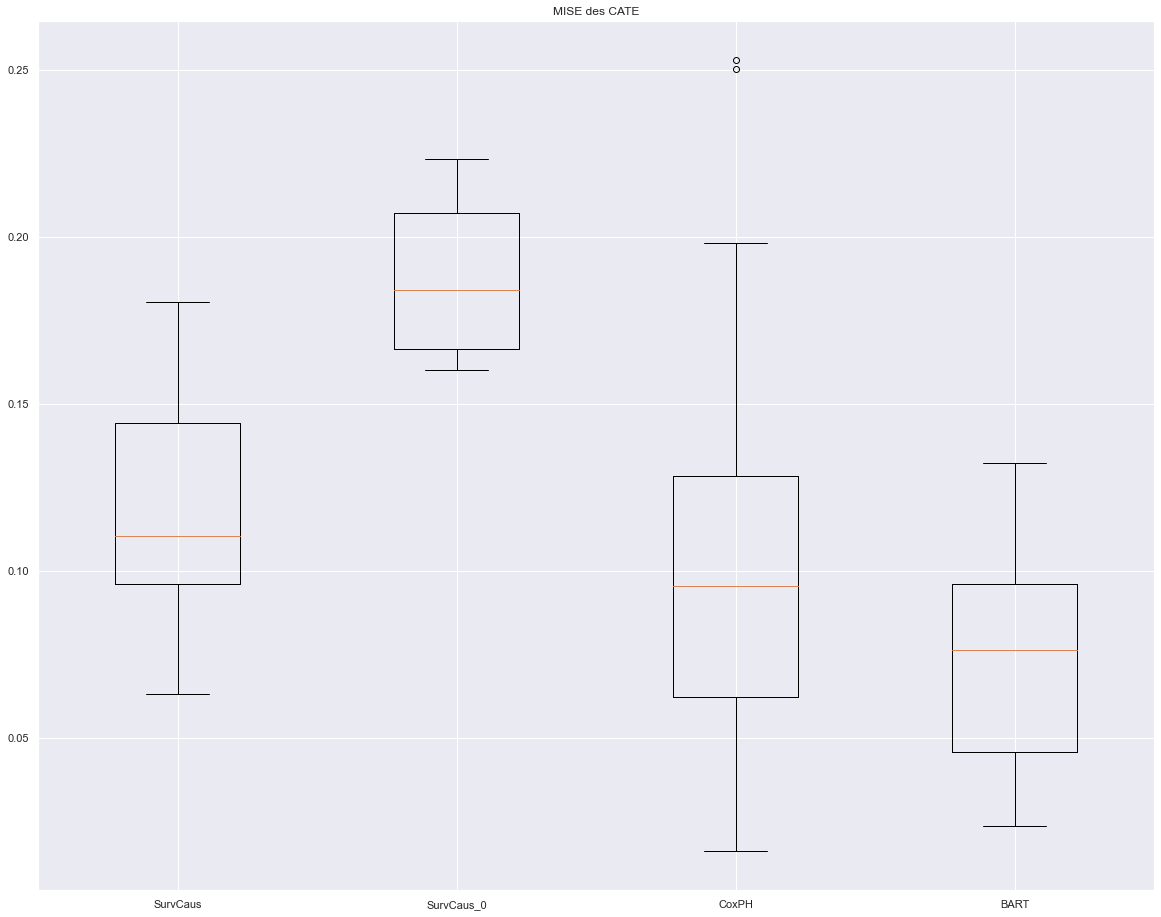

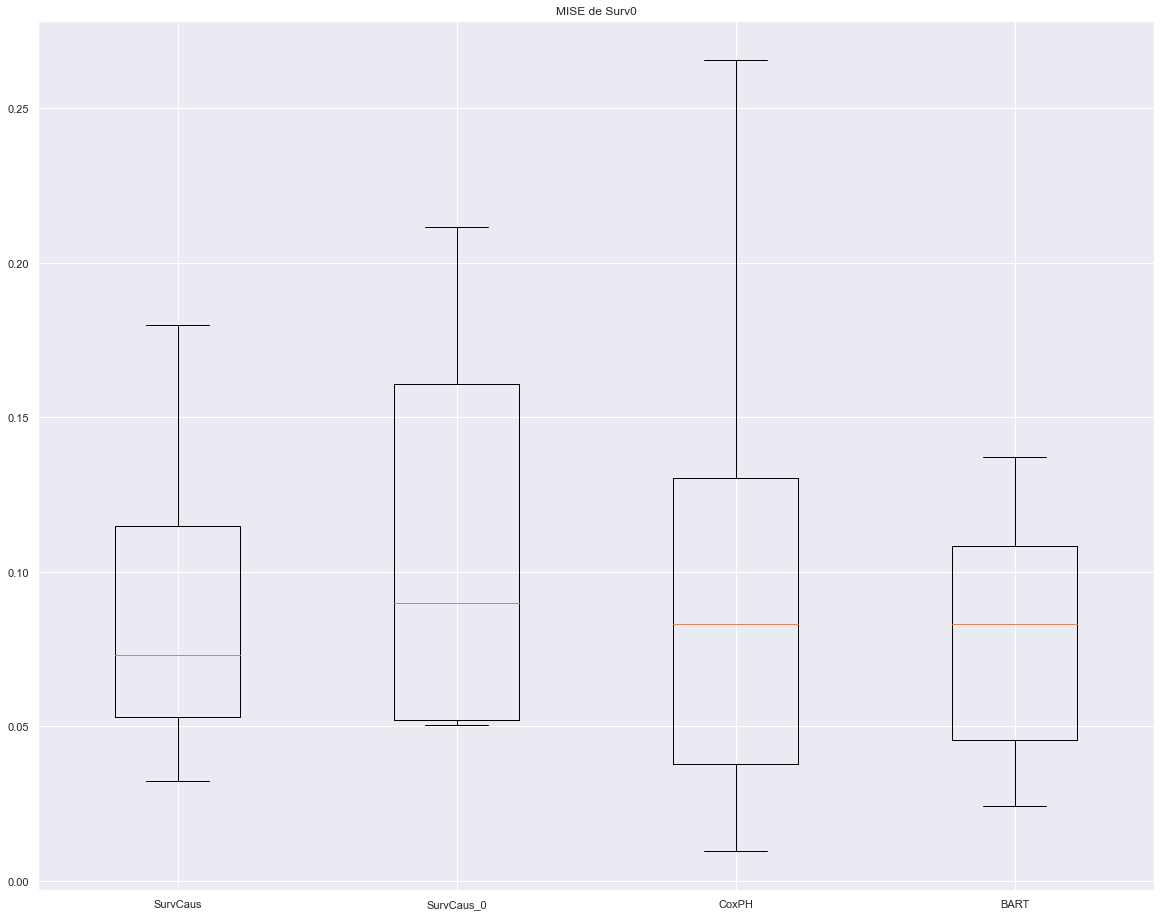

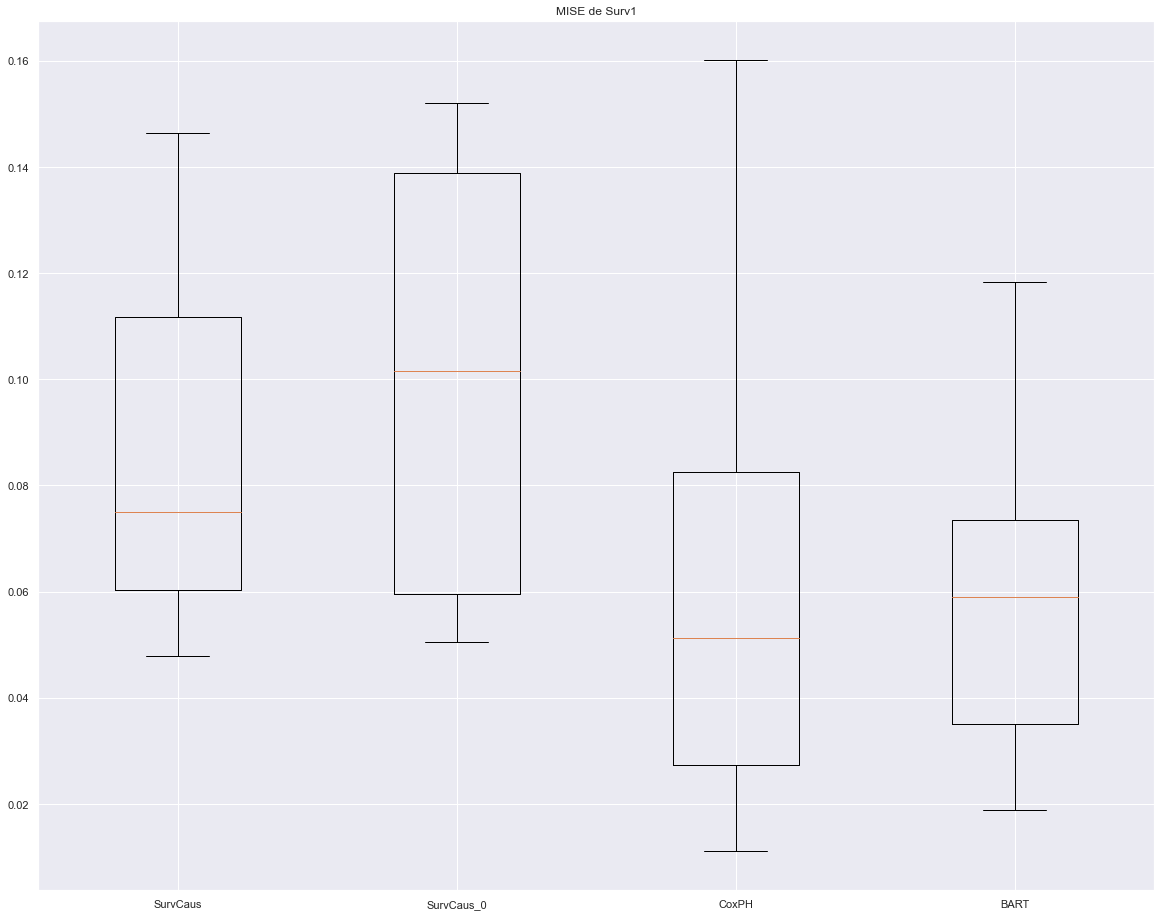

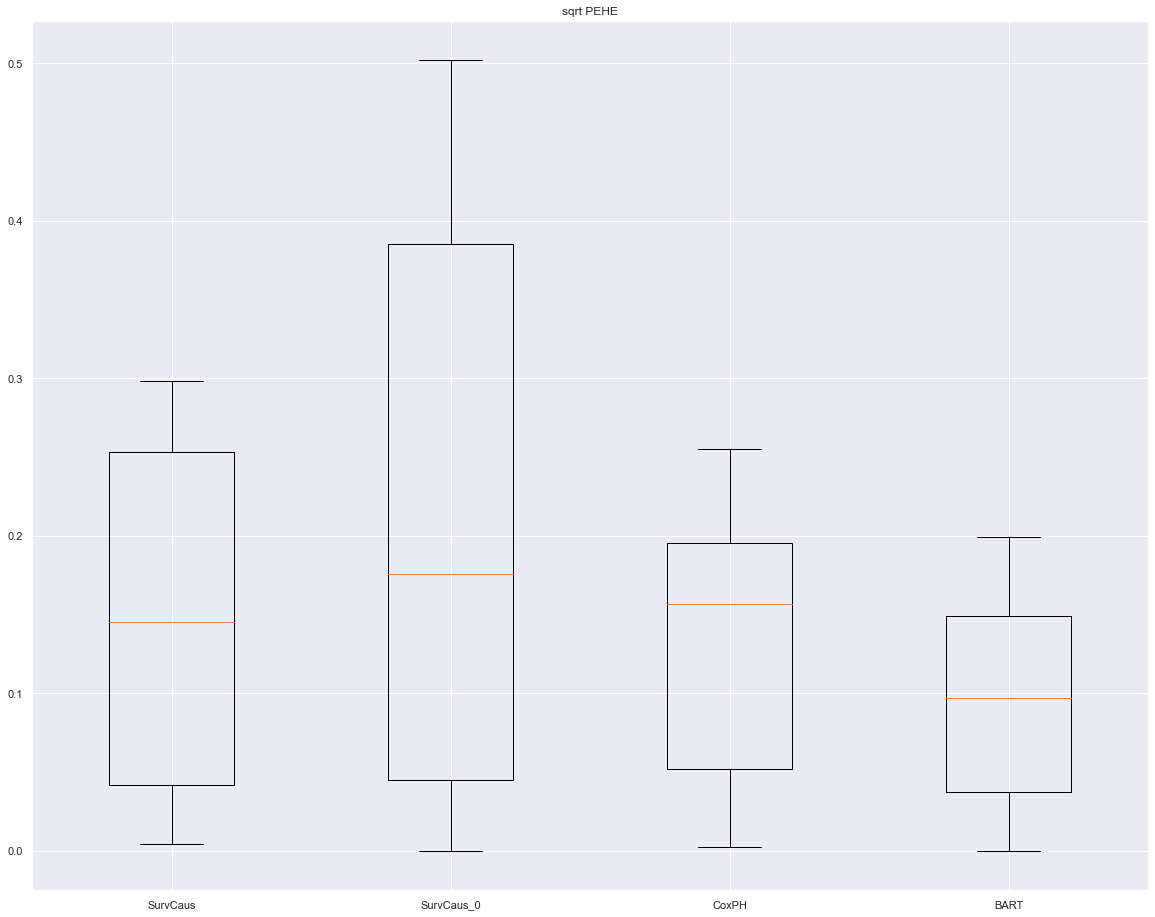

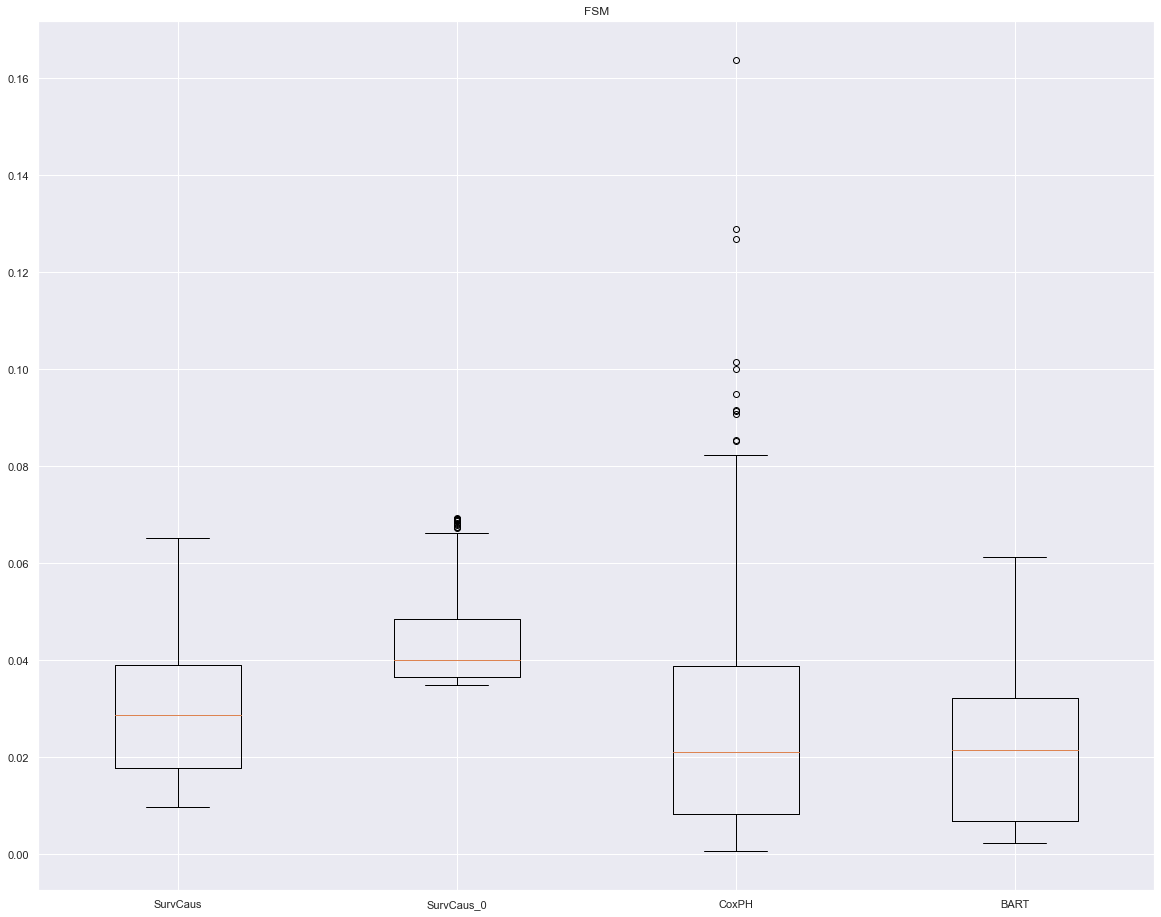

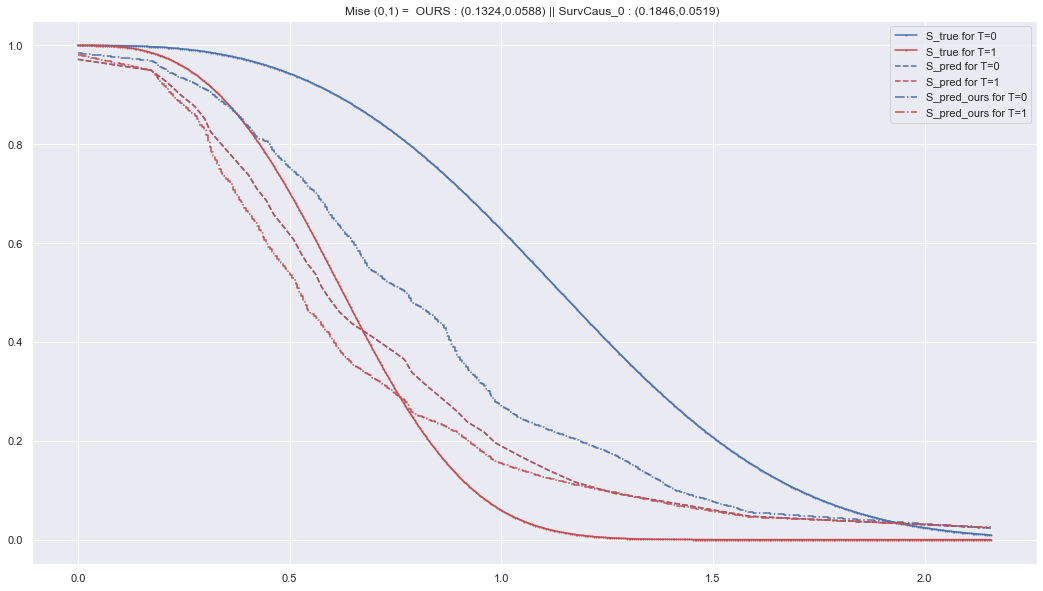

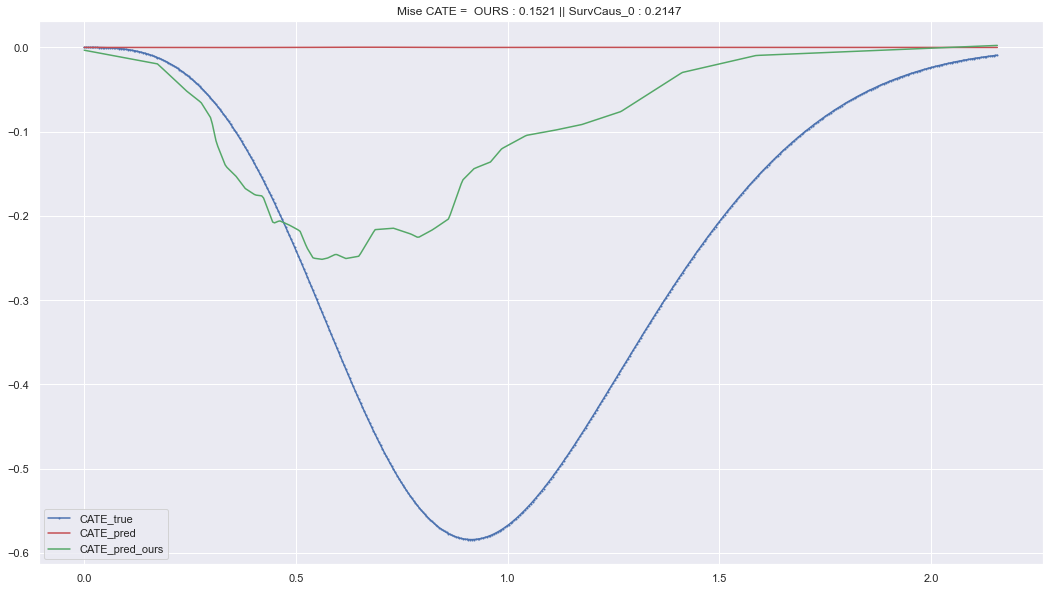

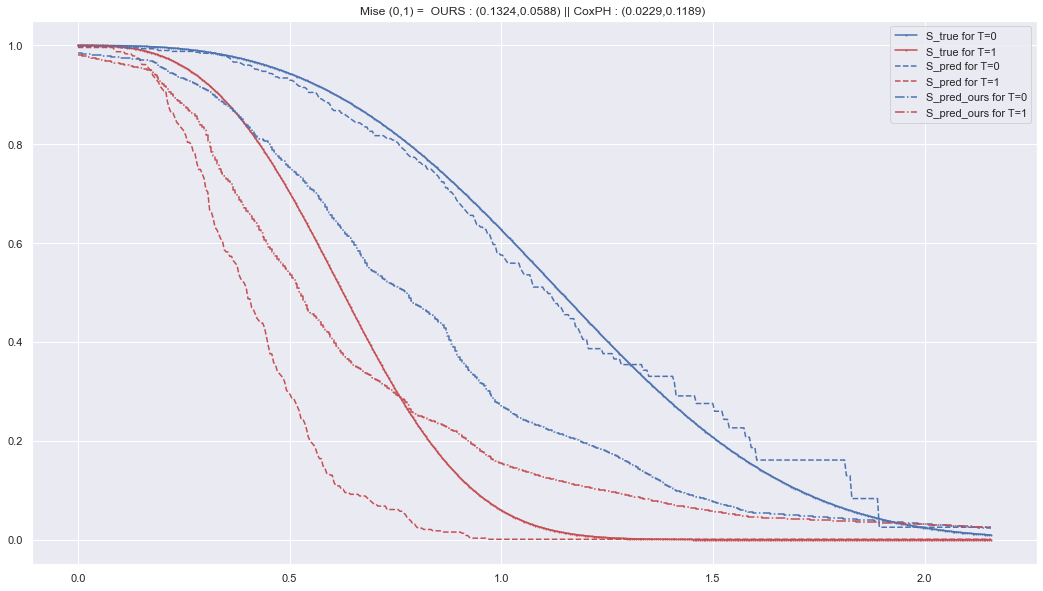

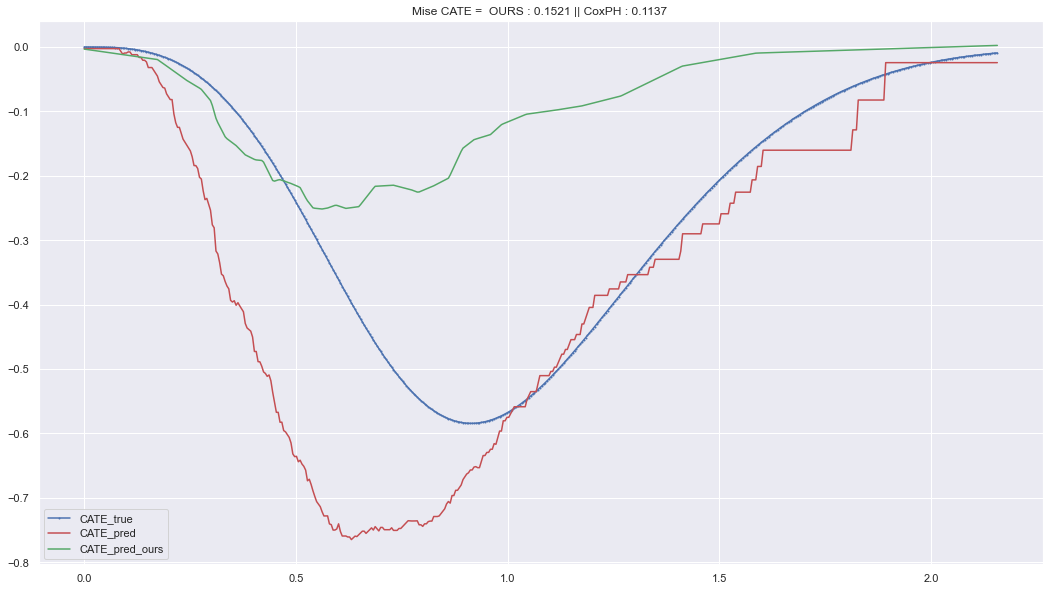

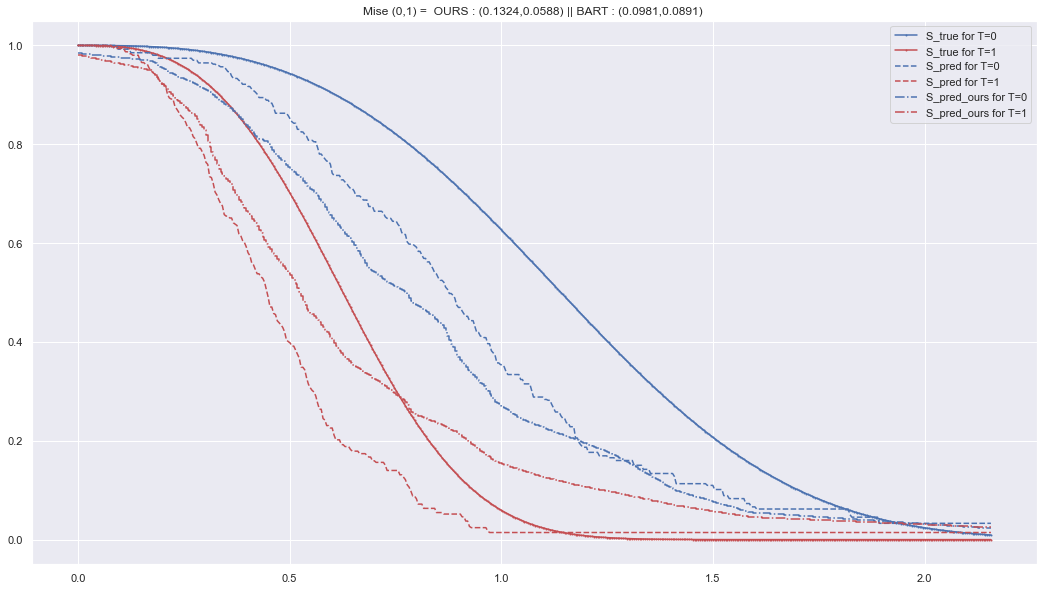

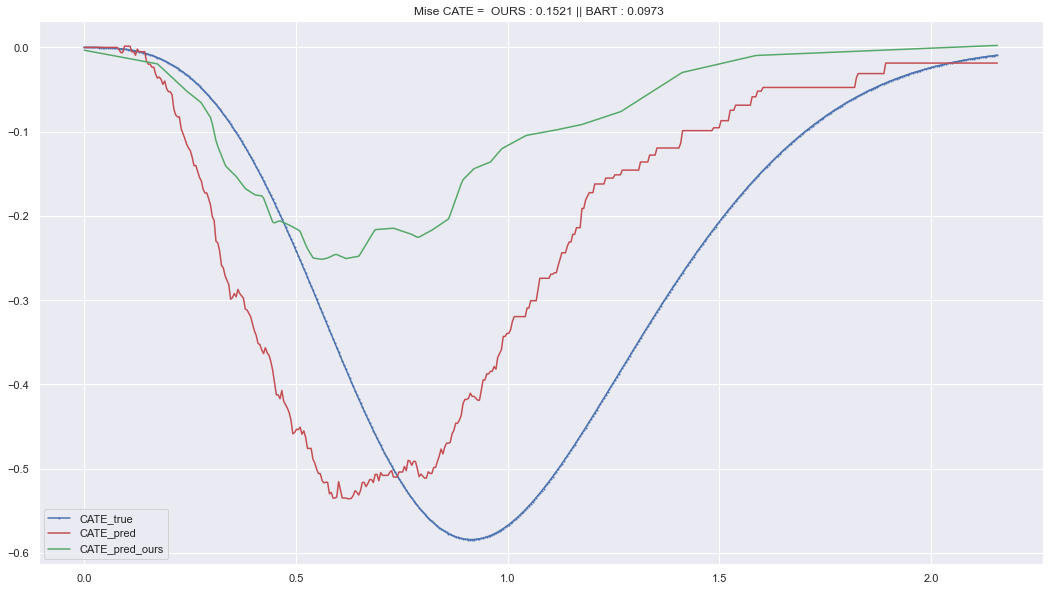

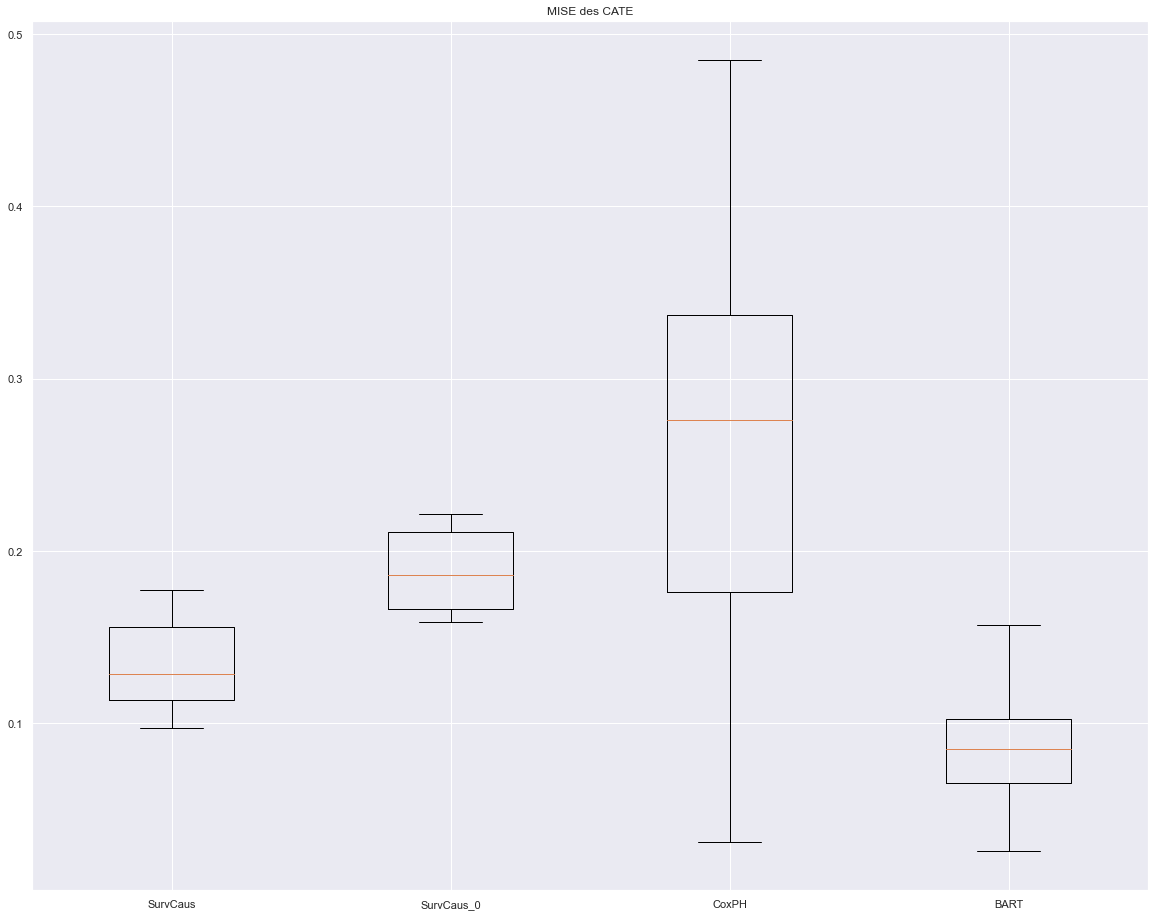

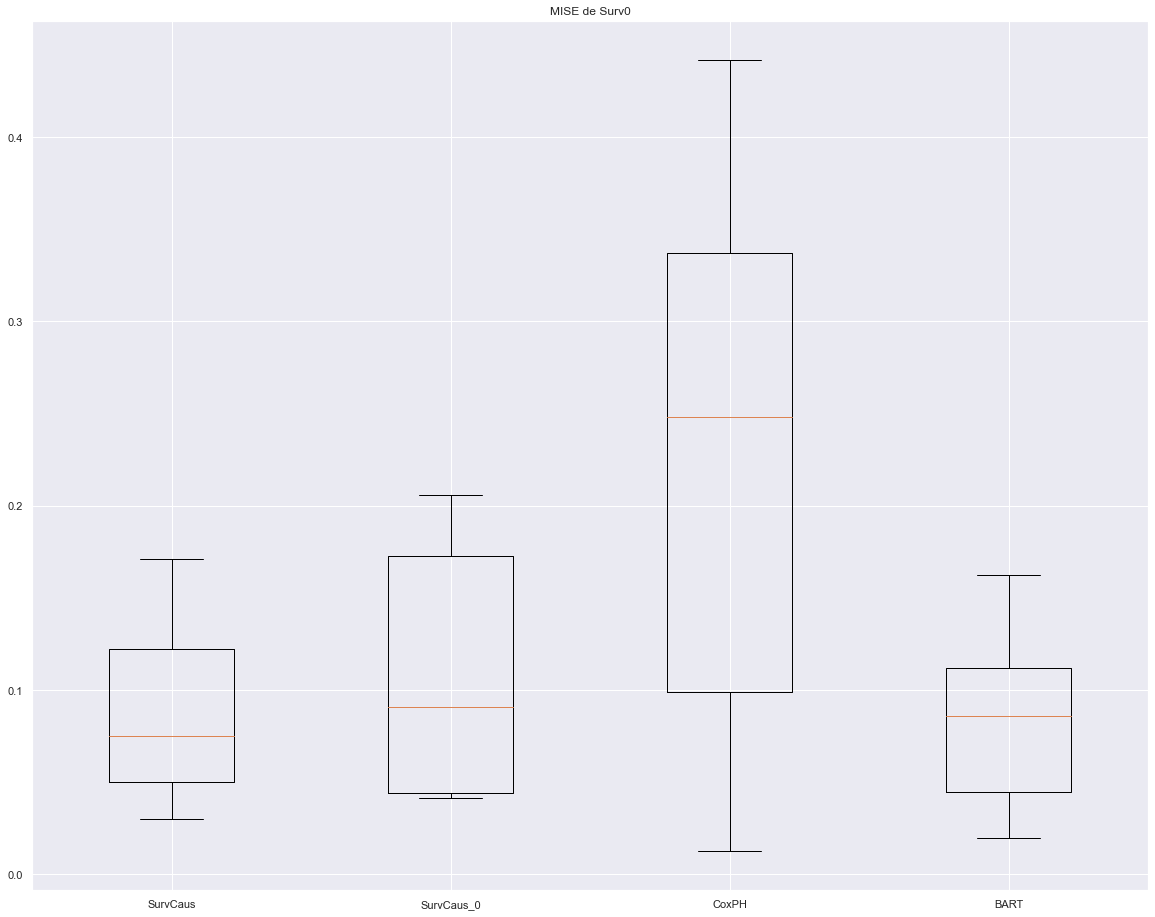

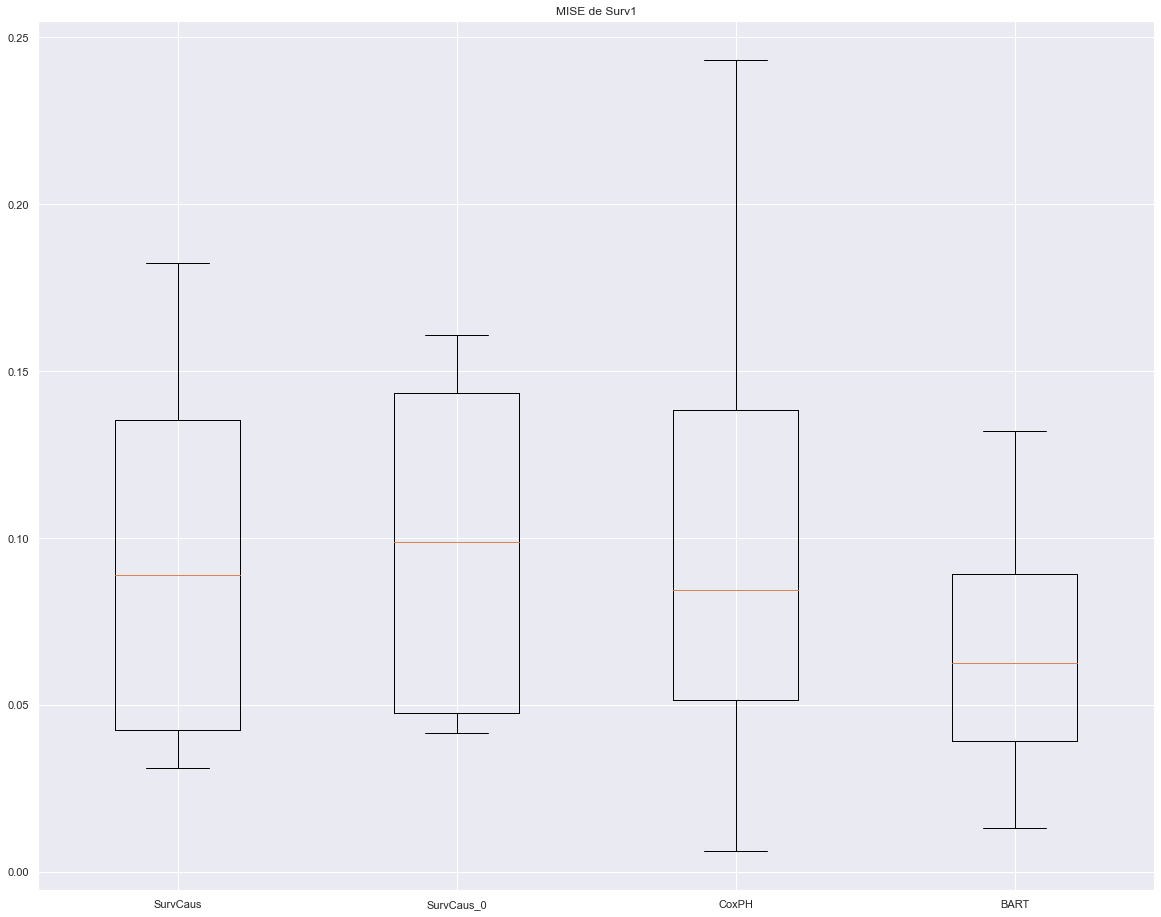

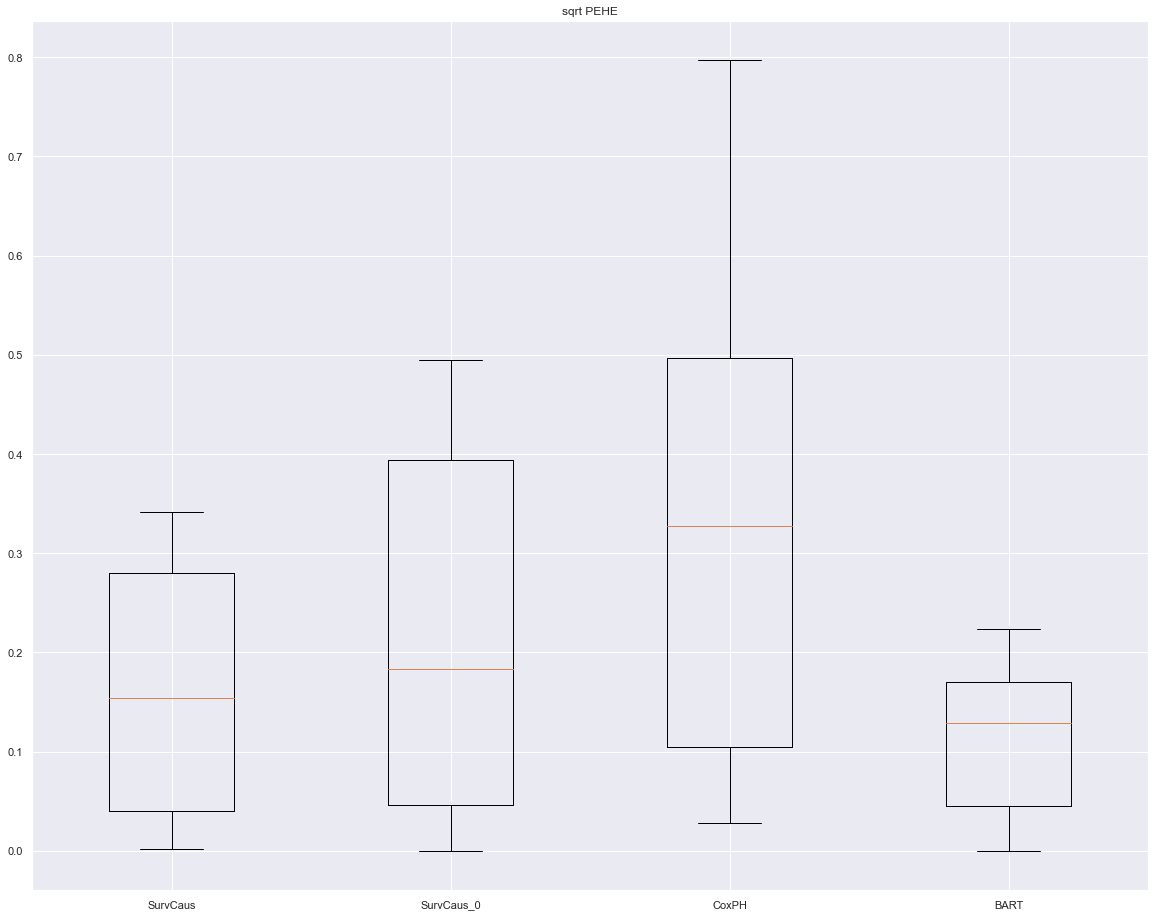

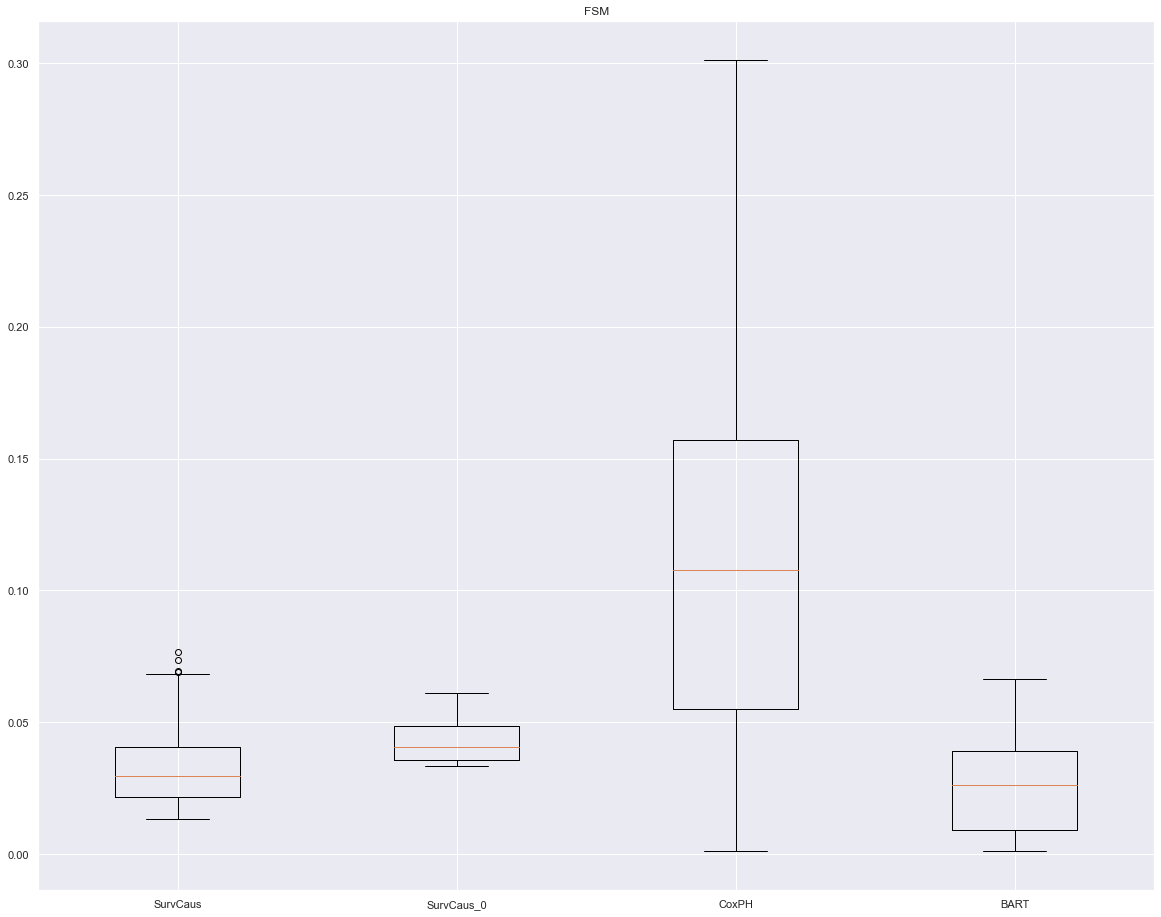

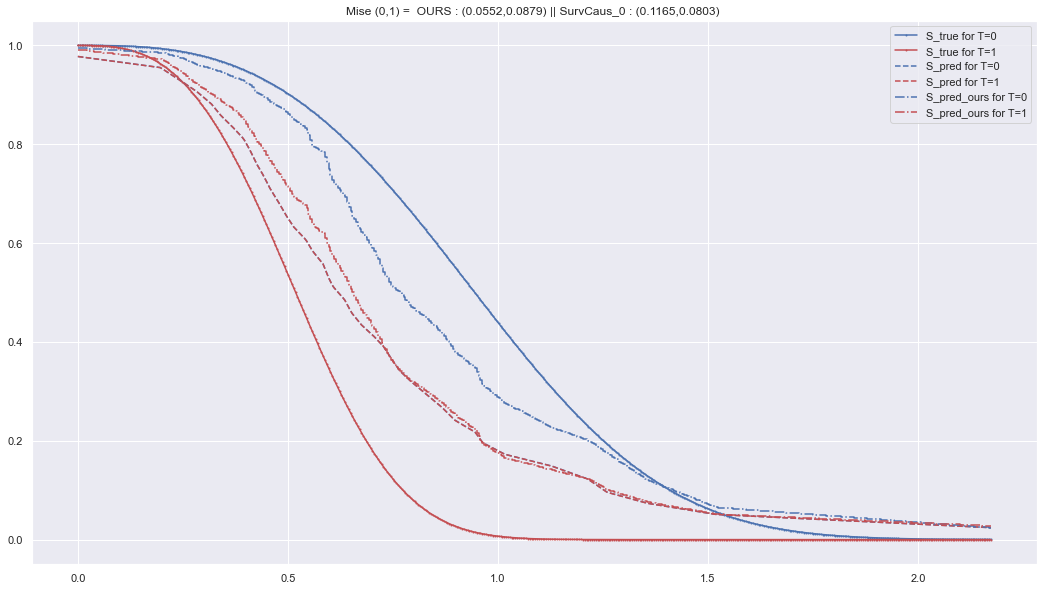

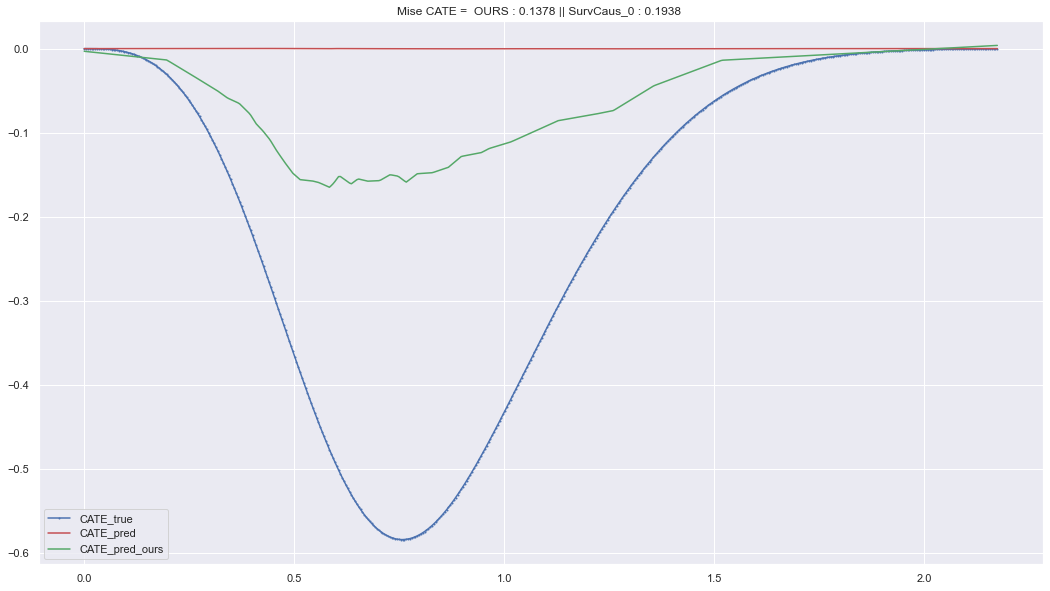

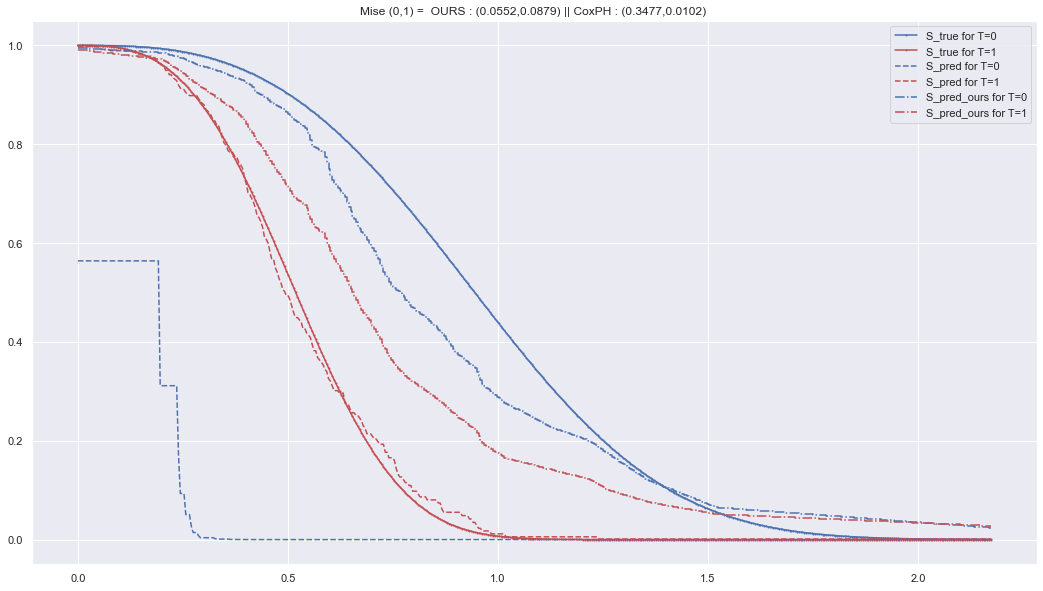

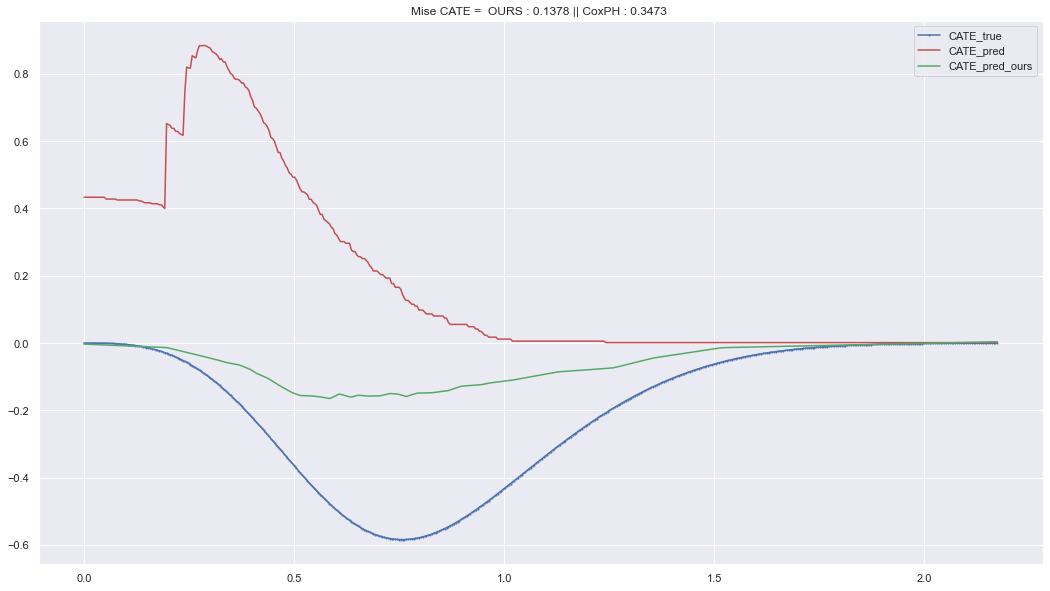

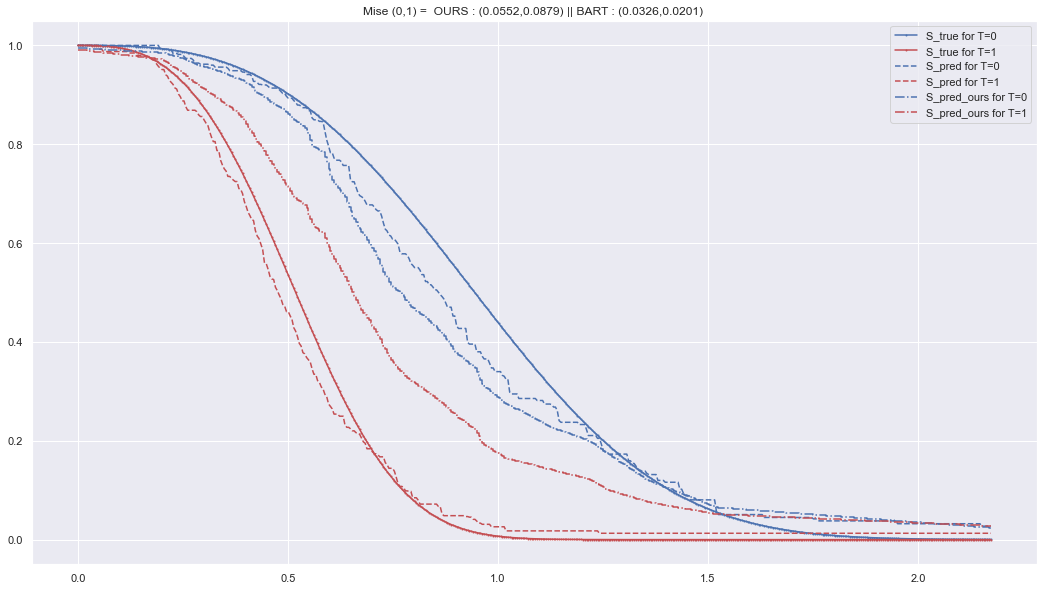

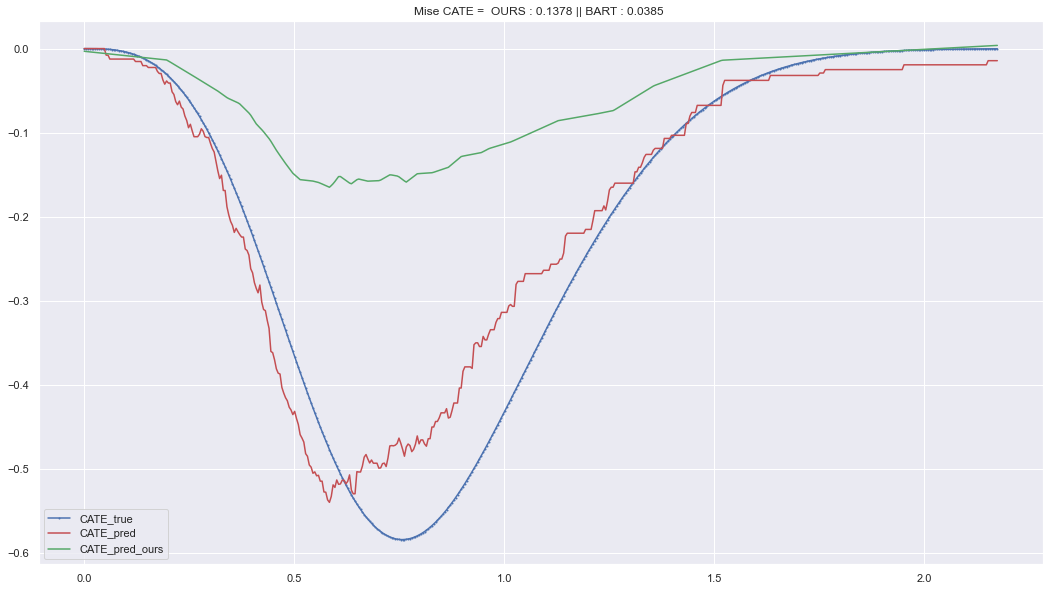

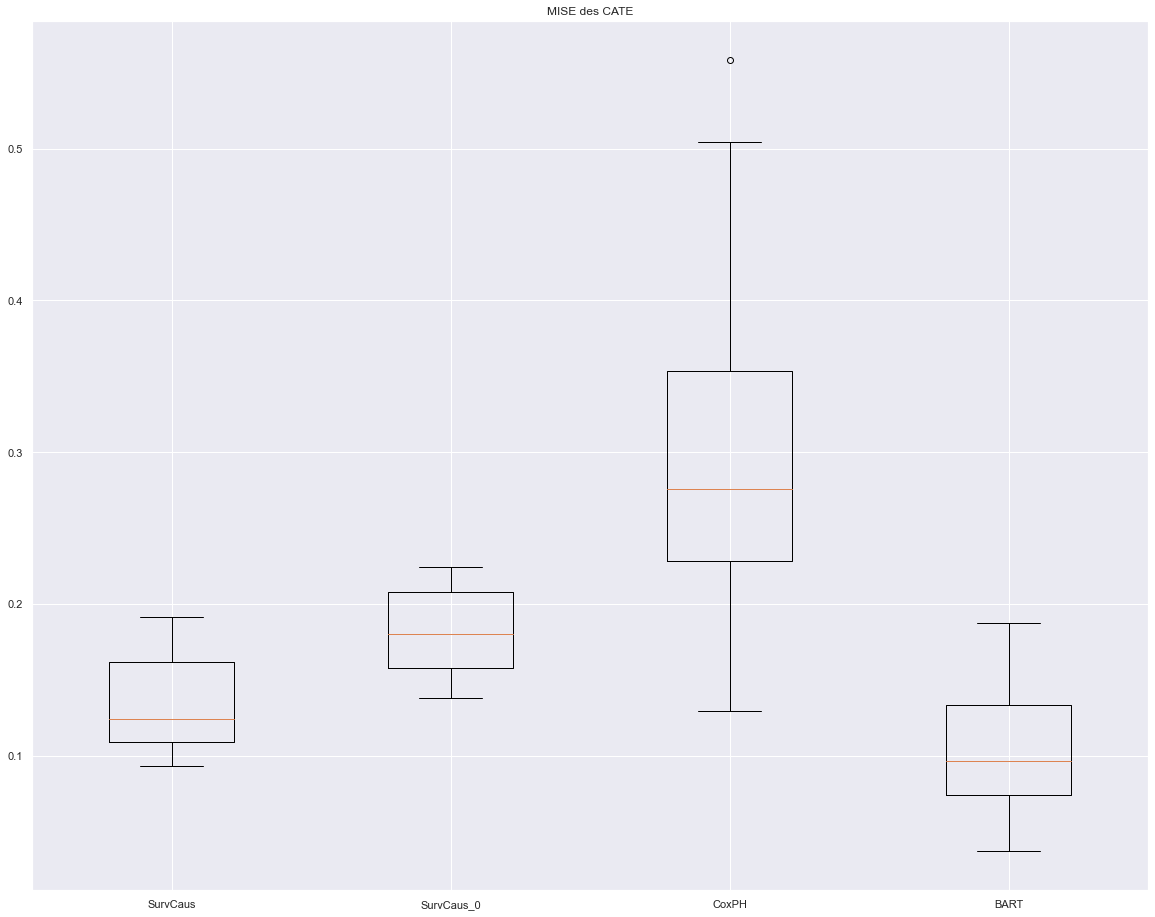

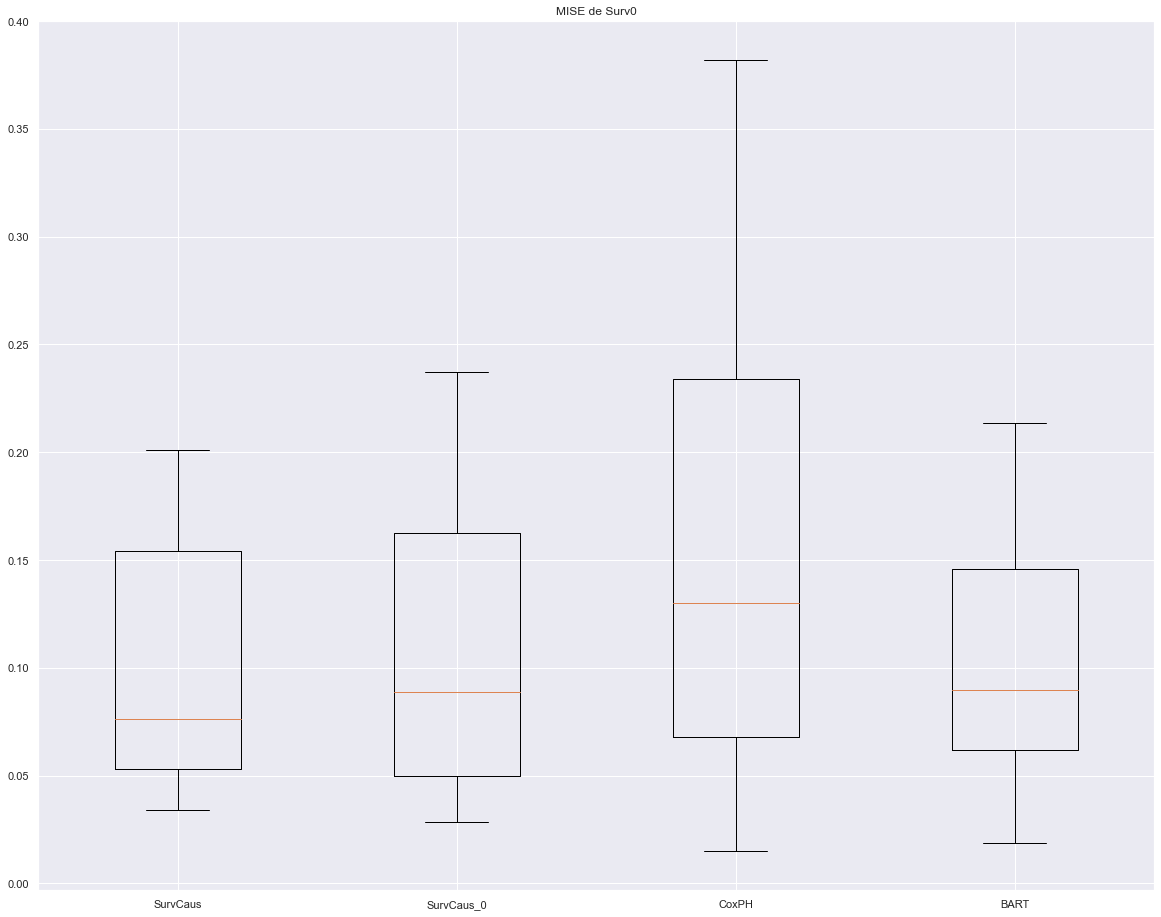

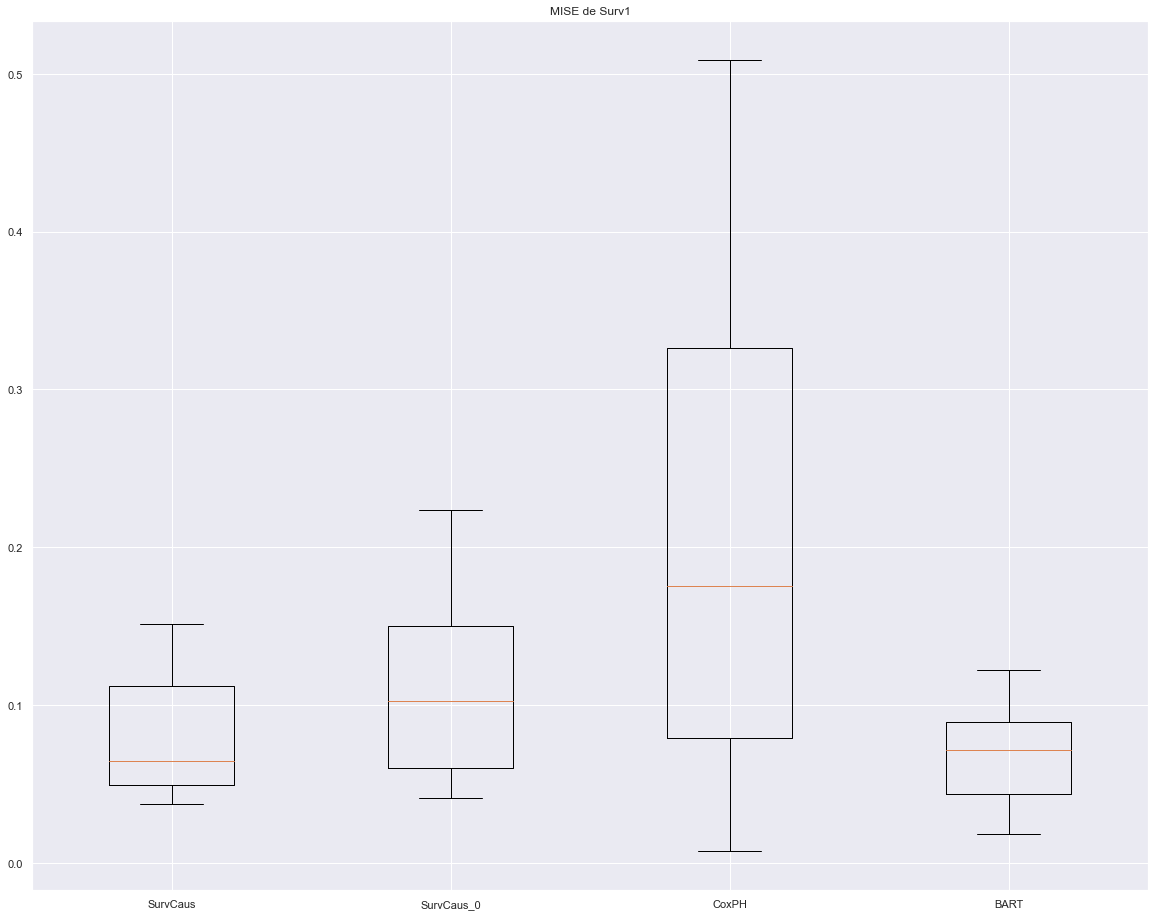

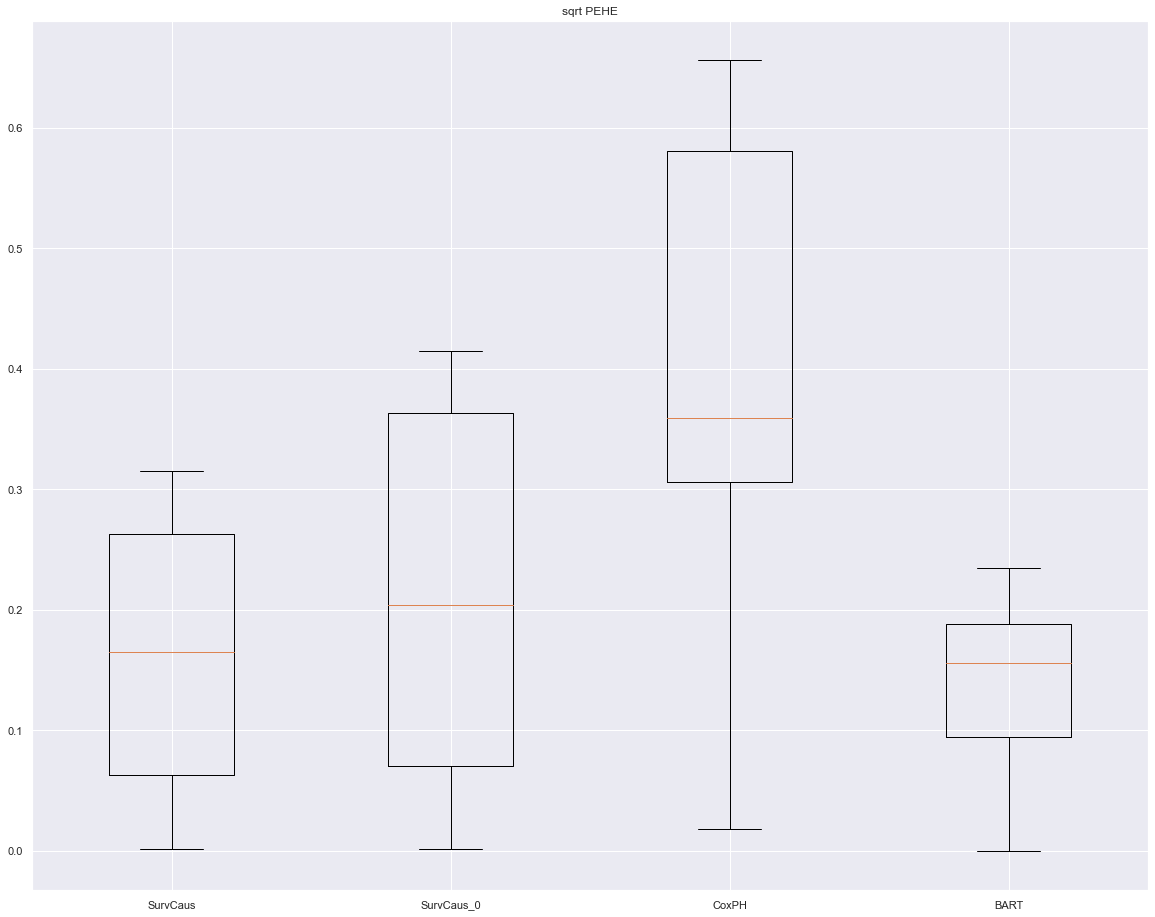

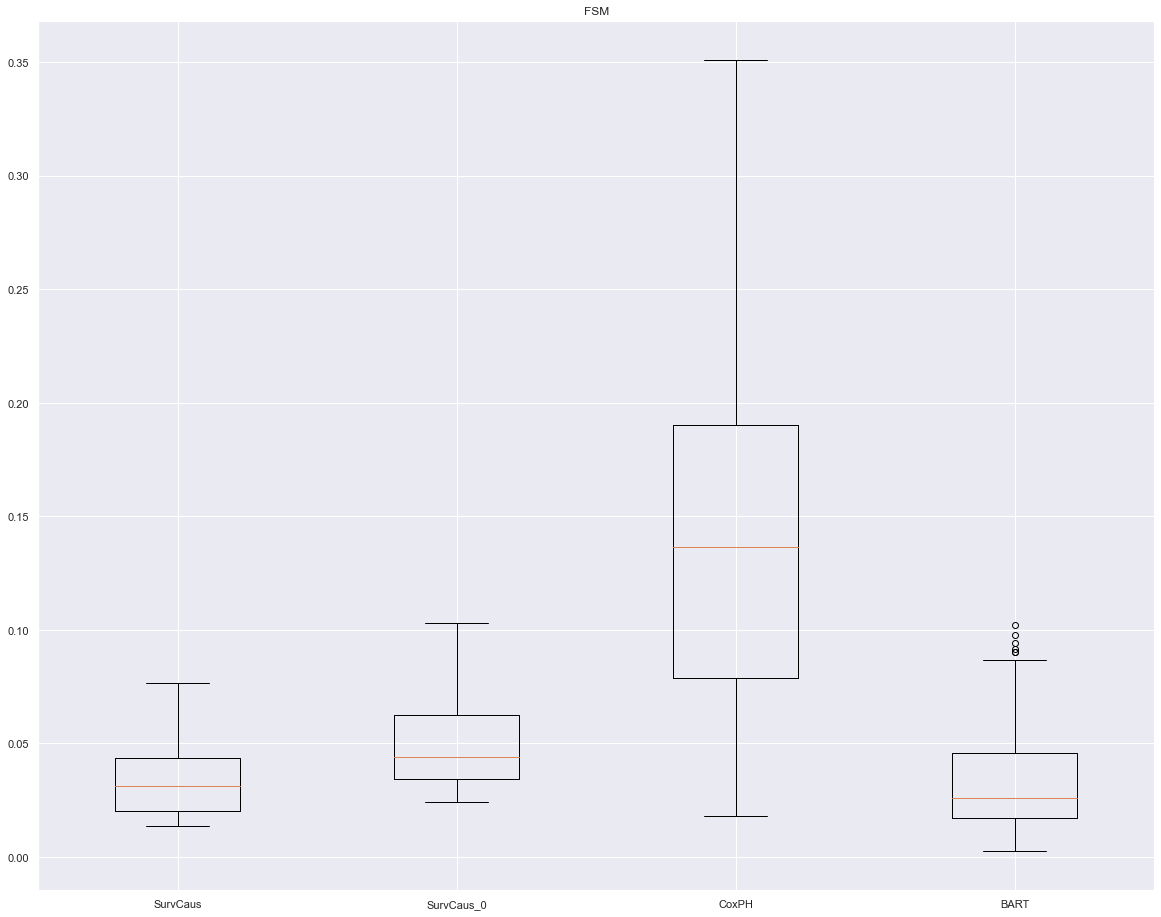

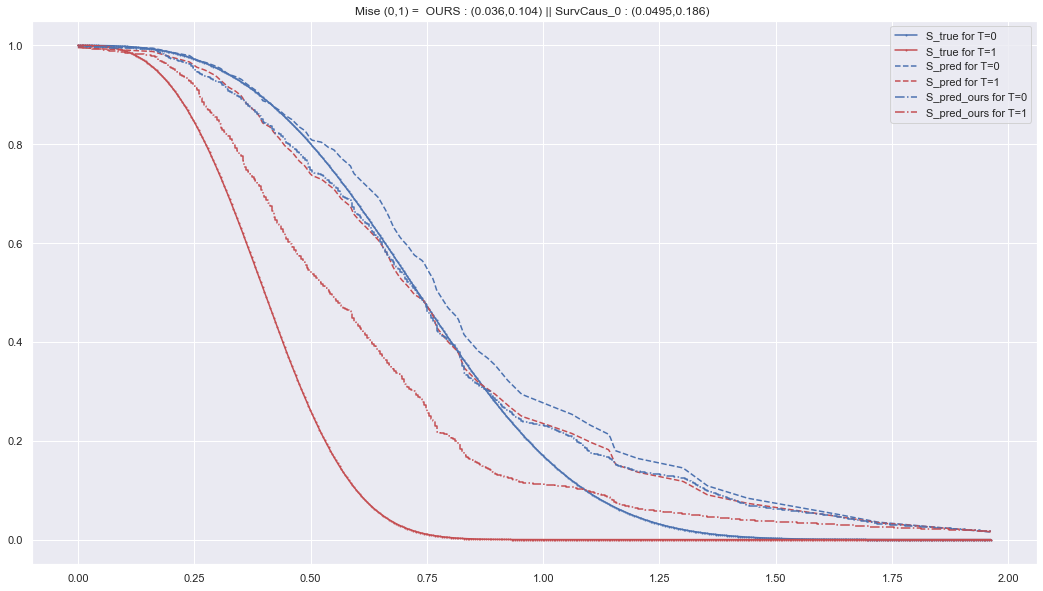

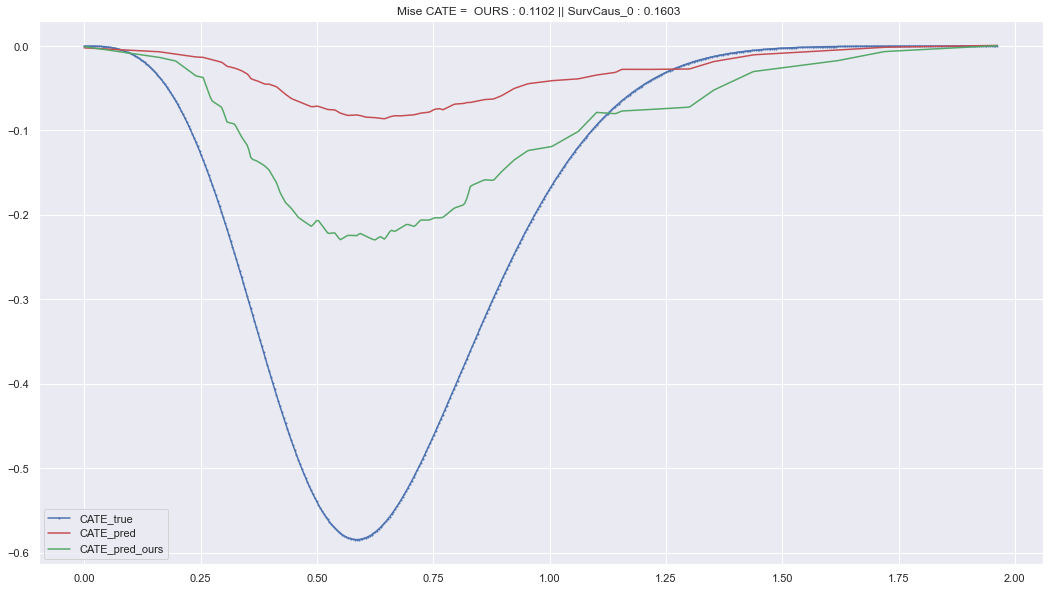

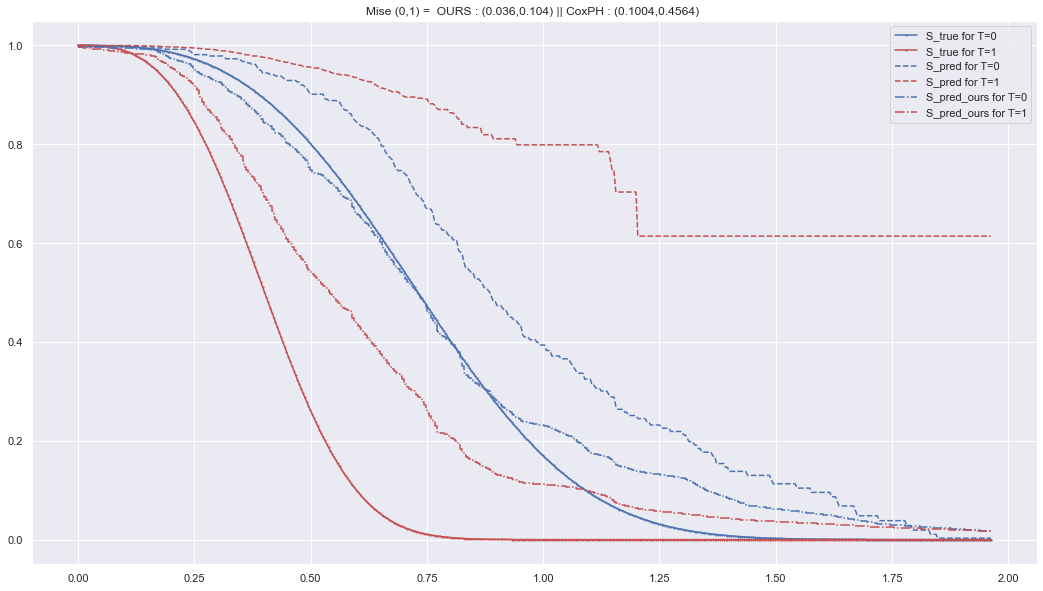

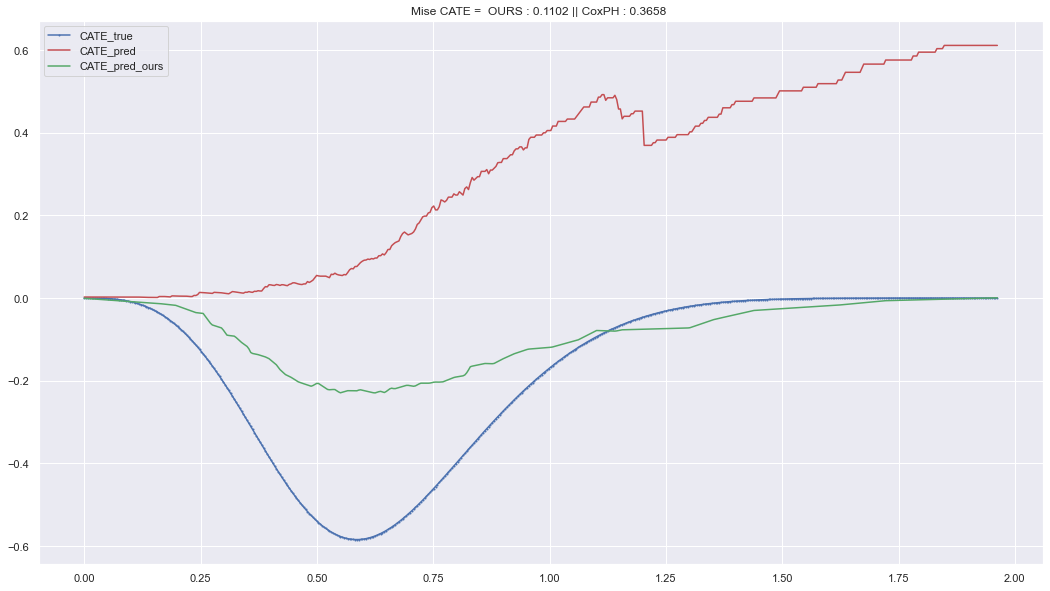

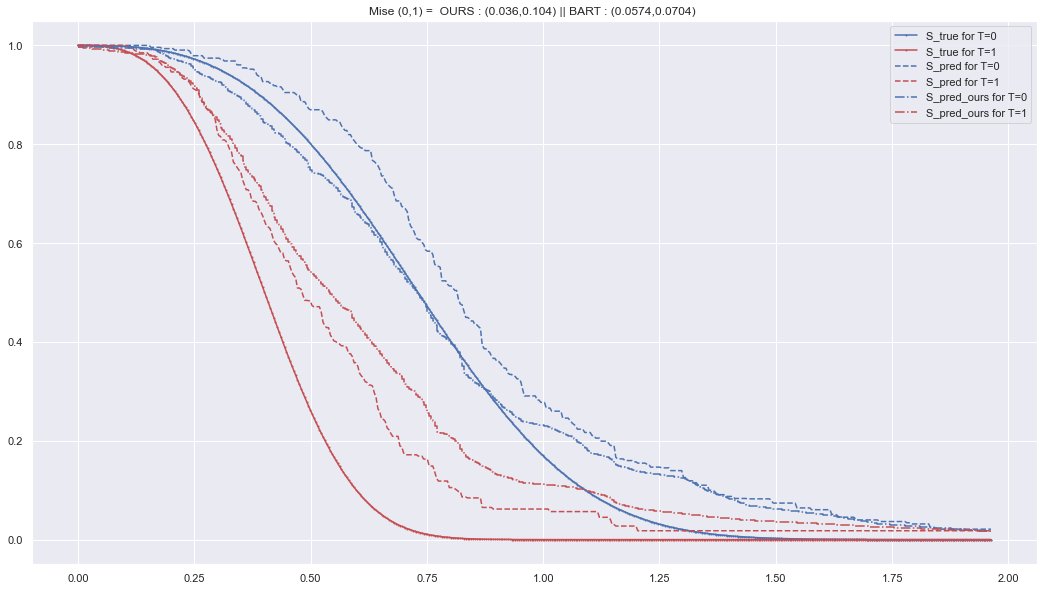

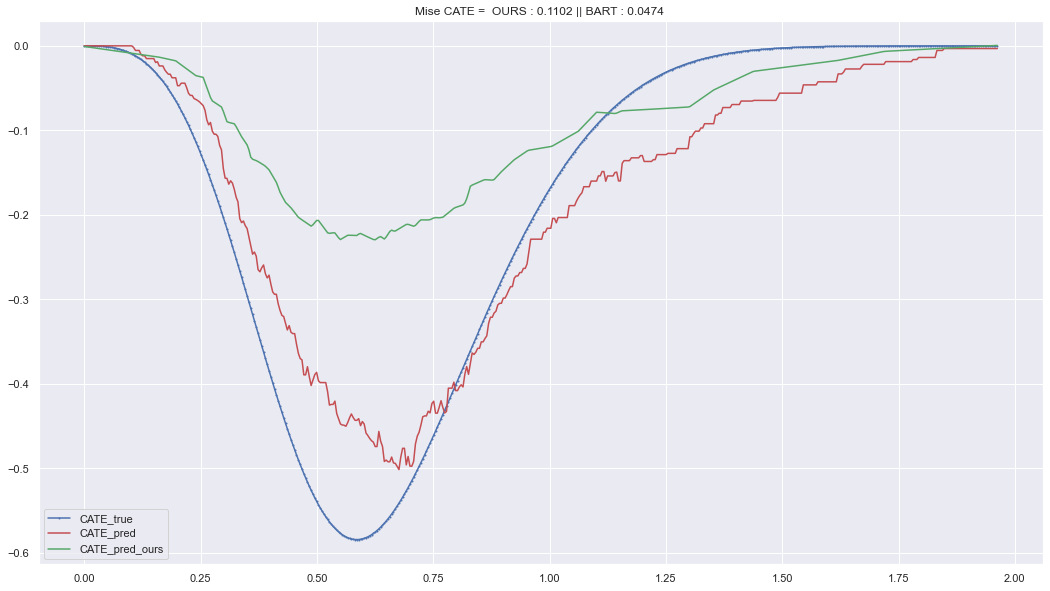

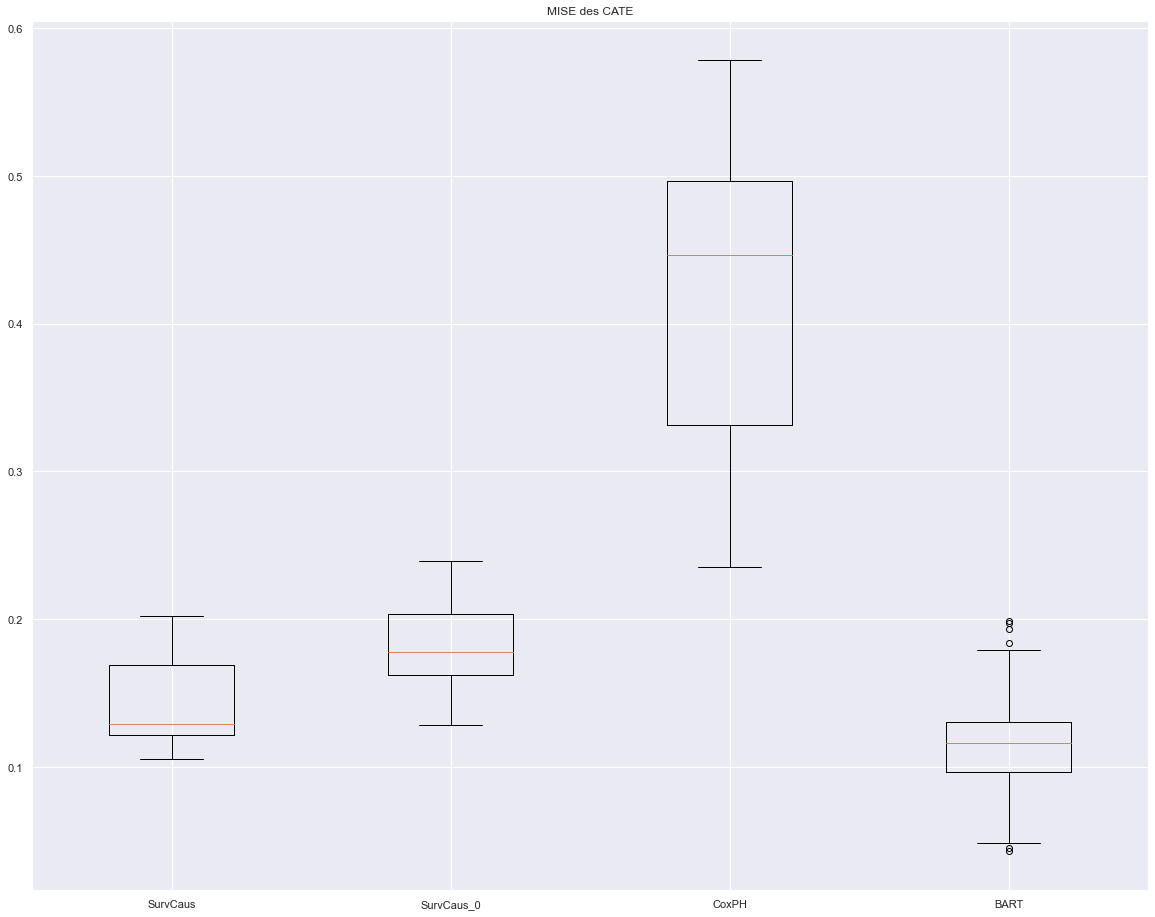

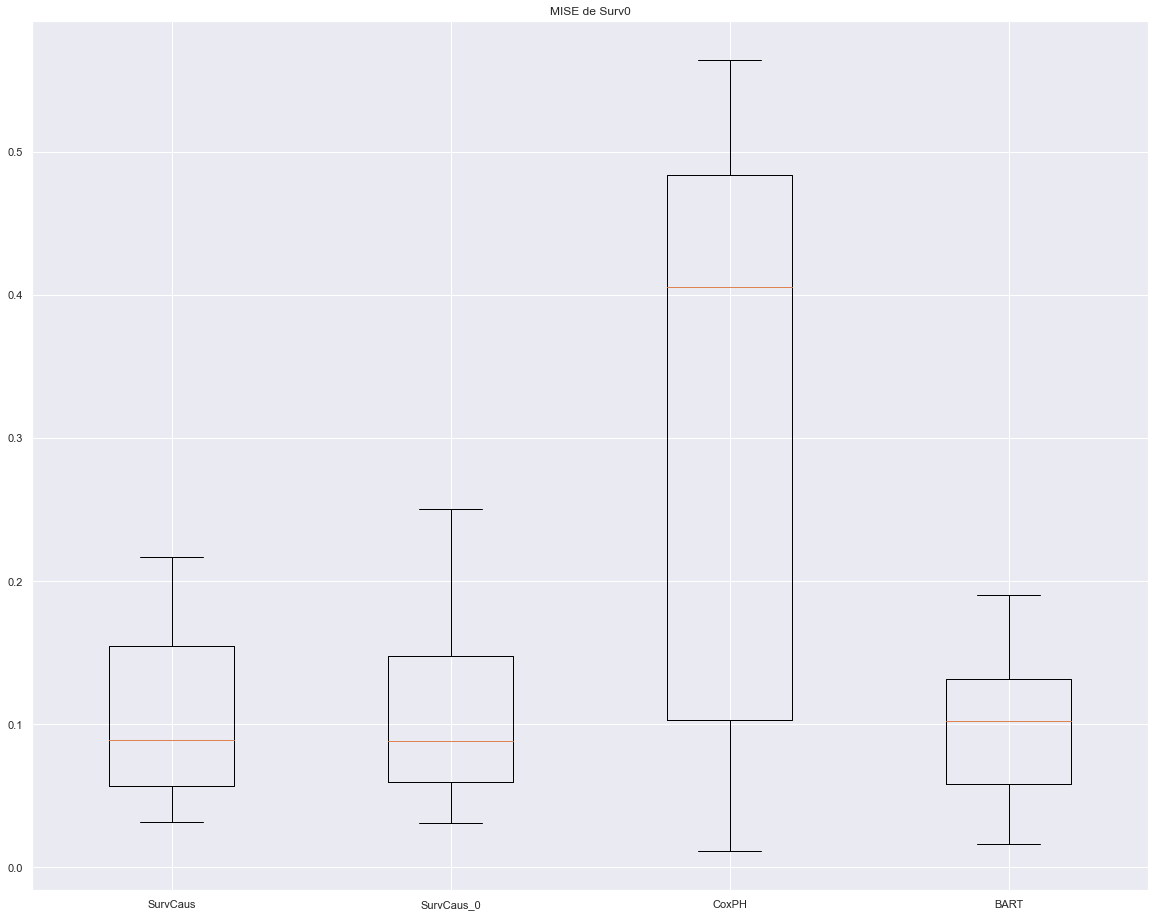

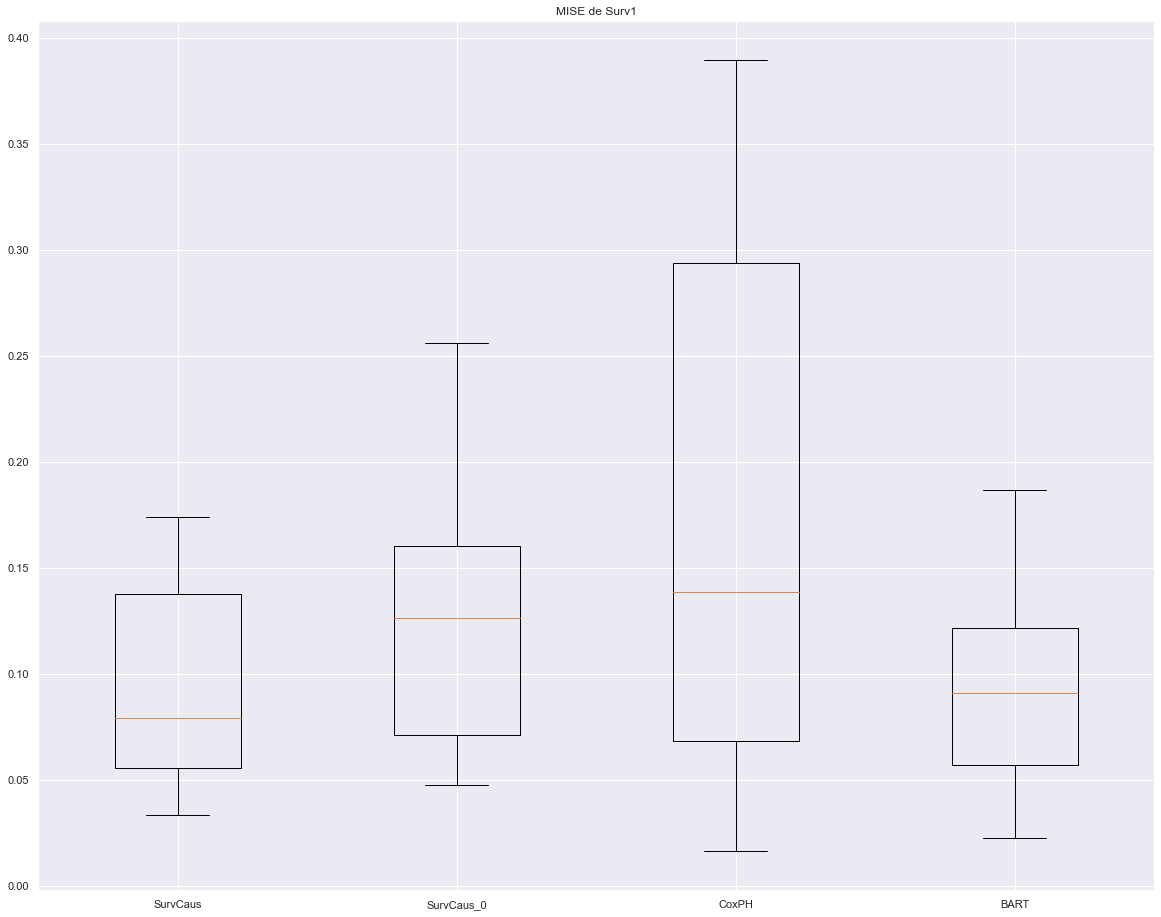

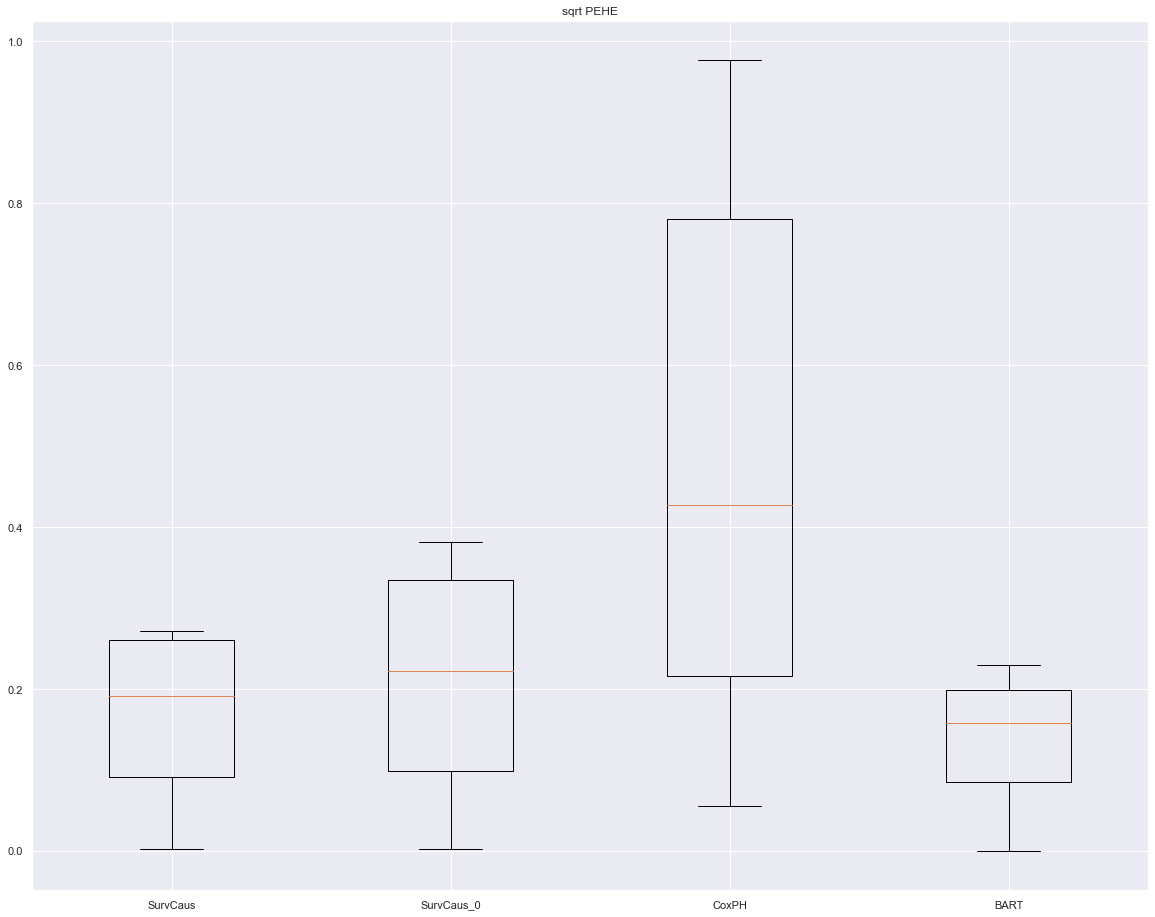

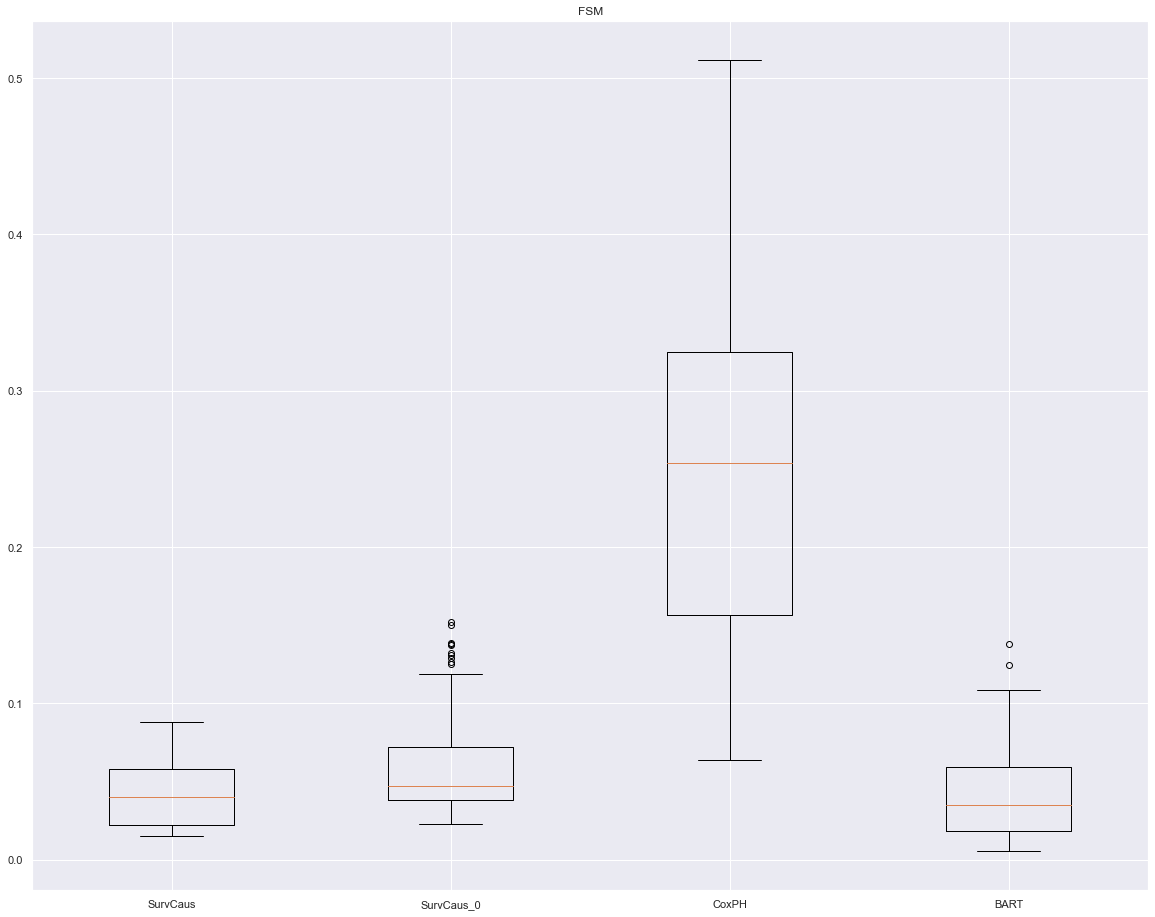

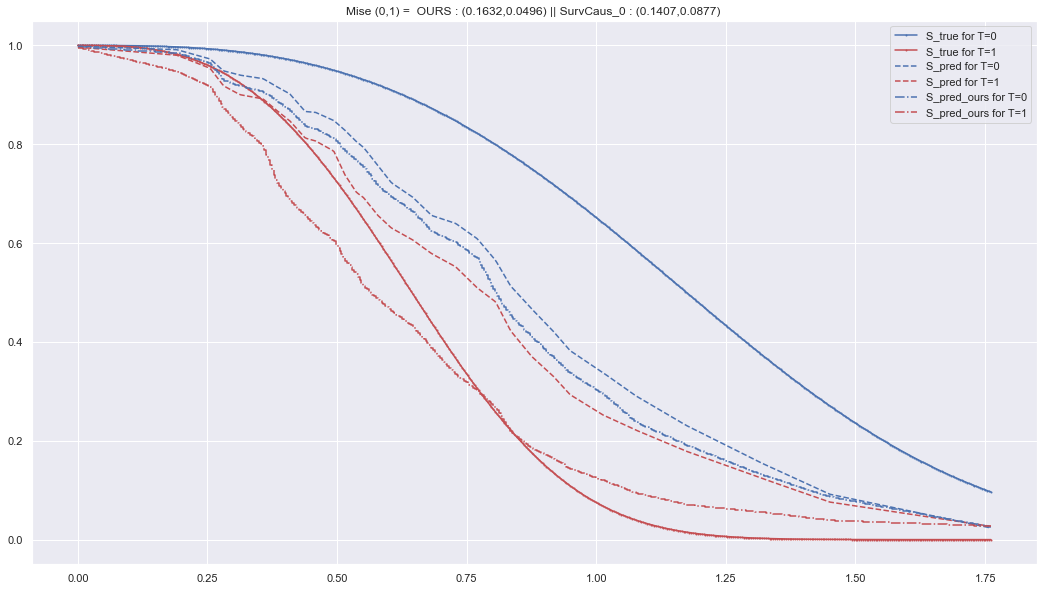

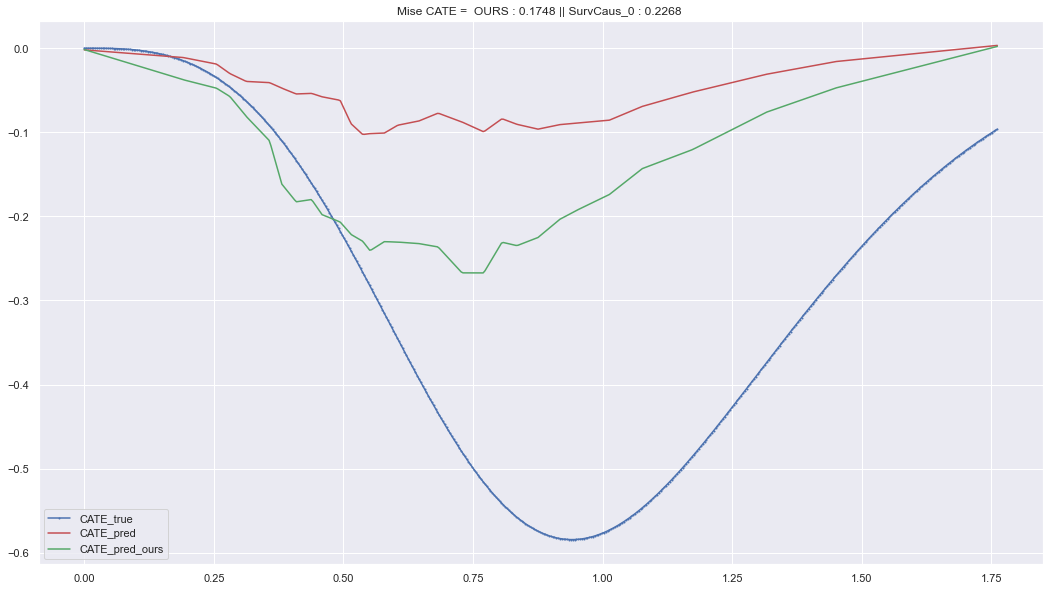

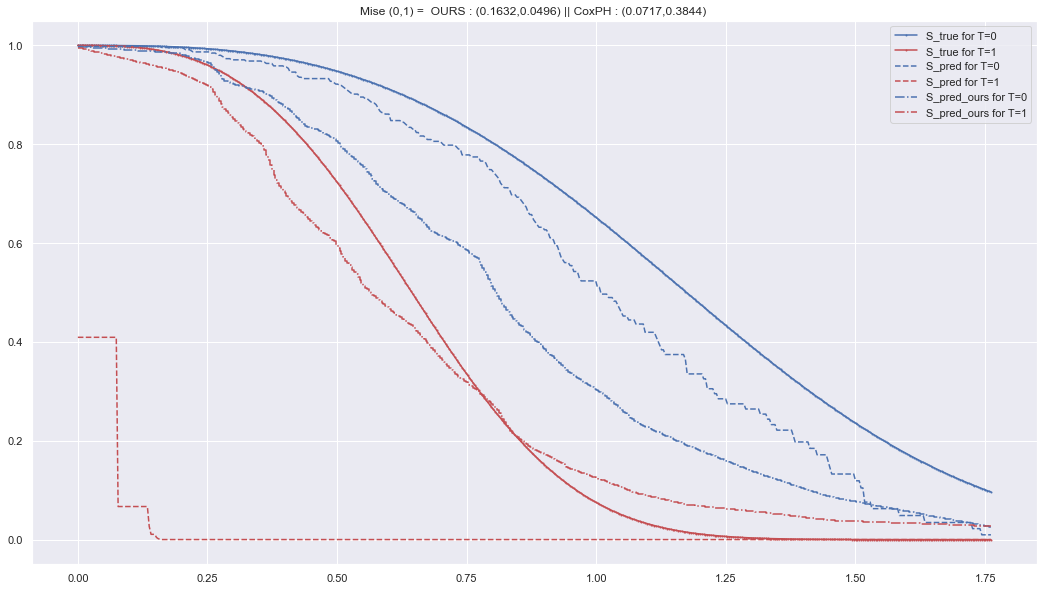

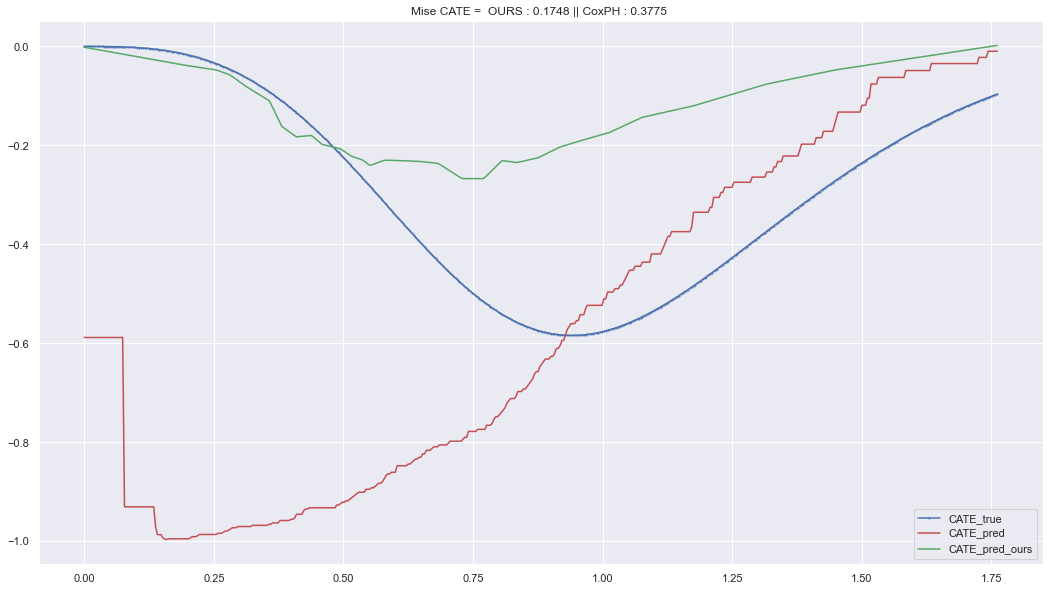

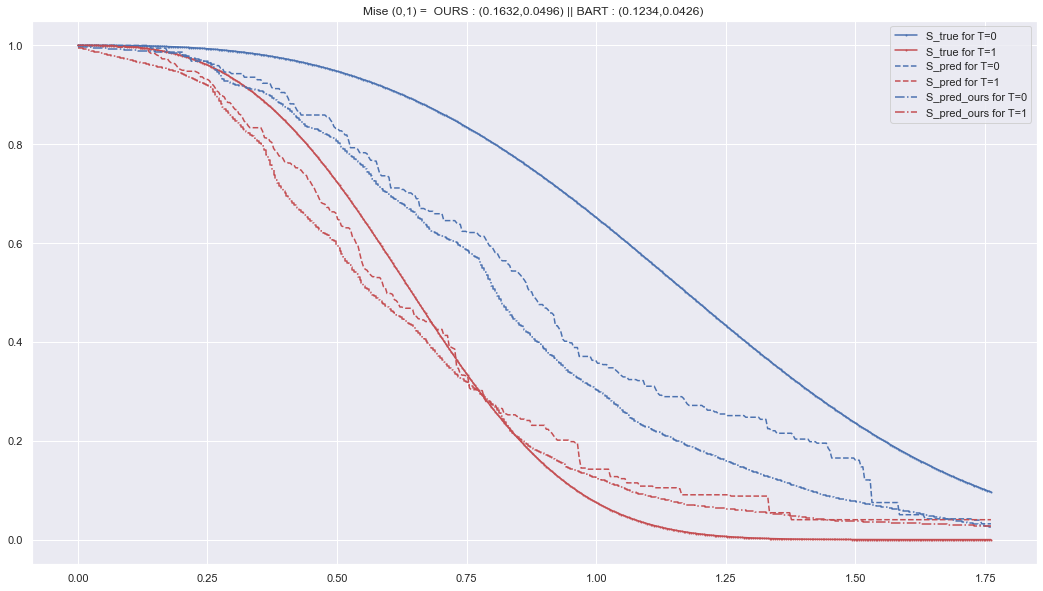

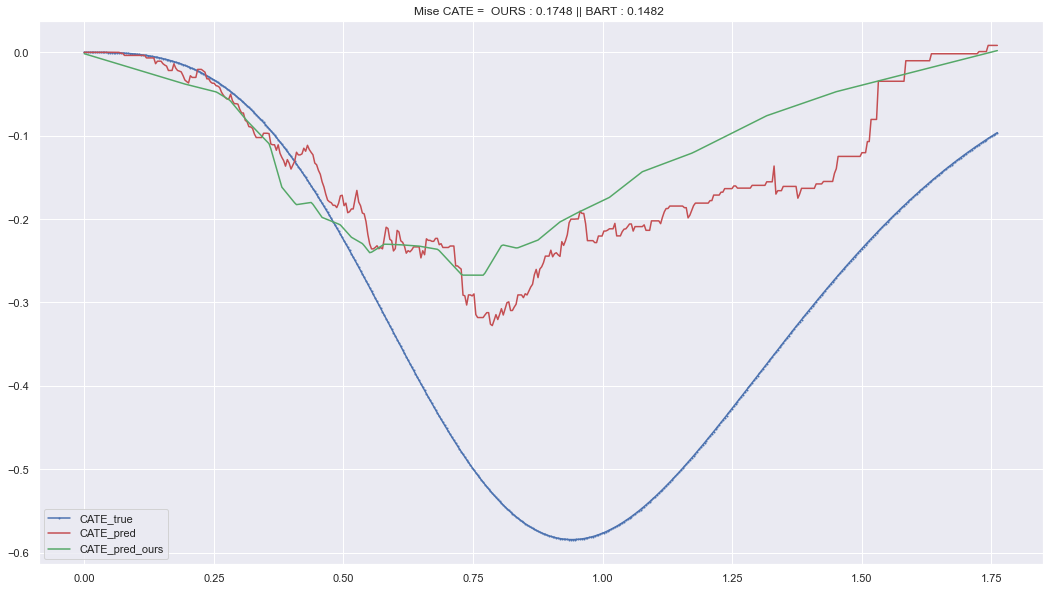

2021-11-17 09:25:00.197 WARNING urllib3.connection: Certificate did not match expected hostname: app.neptune.ai. Certificate: {'subject': ((('countryName', 'FR'),), (('postalCode', '91000'),), (('stateOrProvinceName', 'Île-de-France'),), (('localityName', 'Évry-Courcouronnes'),), (('streetAddress', 'Boulevard François Mitterrand'),), (('organizationName', "Université d'Evry Val d'Essonne"),), (('commonName', 'ucopia-ueve.univ-evry.fr'),)), 'issuer': ((('countryName', 'NL'),), (('organizationName', 'GEANT Vereniging'),), (('commonName', 'GEANT OV RSA CA 4'),)), 'version': 3, 'serialNumber': '338D6A983193F343D2E827CB4CDBCDA4', 'notBefore': 'Dec 11 00:00:00 2020 GMT', 'notAfter': 'Dec 11 23:59:59 2021 GMT', 'subjectAltName': (('DNS', 'ucopia-ueve.univ-evry.fr'), ('DNS', 'nat-ucopia-v.univ-evry.fr'), ('DNS', 'ucopia-shib.univ-evry.fr'), ('DNS', 'ucopia-v.univ-evry.fr')), 'OCSP': ('http://GEANT.ocsp.sectigo.com',), 'caIssuers': ('http://GEANT.crt.sectigo.com/GEANTOVRSACA4.crt',), 'crlDistri

In [4]:
WD_param_list= [0,5,10,20]
nep_WD = Neptune("WD_v3")
nep_WD.create_experiment()


for wd_param in WD_param_list:
    p_sim['wd_param'] = wd_param
    nep_WD.set_p_survcaus_best(p_survcaus)
    nep_WD.run_simulation(p_sim)
    nep_WD.run_tunning_survcaus(n_trials = 1)
    nep_WD.run_tunning_bart(n_trials = 1)
    nep_WD.launch_benchmark()
    nep_WD.get_plots_patients()


nep_WD.concatenate_list_bilan()